In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder
from feature_engine.encoding import OrdinalEncoder, RareLabelEncoder
from category_encoders import HashingEncoder


from feature_engine.selection import RecursiveFeatureElimination, DropDuplicateFeatures, DropCorrelatedFeatures
from feature_engine.selection import SmartCorrelatedSelection, SelectByShuffling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score



In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Reading Datasets

In [3]:
train_claim = pd.read_csv('Train_Claim.csv',na_values = "?")
train_demographics= pd.read_csv('Train_Demographics.csv',na_values = "?")
train_policy = pd.read_csv('Train_Policy.csv', na_values = "?")
train_vehicle = pd.read_csv('Train_Vehicle.csv', na_values = "?")
train_data = pd.read_csv('Traindata_with_Target.csv', na_values = "?")

In [4]:
(train_claim.shape),(train_demographics.shape),(train_policy.shape),(train_vehicle.shape),(train_data.shape)

((28836, 19), (28836, 10), (28836, 10), (115344, 3), (28836, 2))

In [5]:
train_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,NaN,1,0,NaN,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [6]:
train_claim['train_claim']= 0
train_policy['train_policy']= 0
train_vehicle['train_vehicle']= 0
train_demographics['train_demographics']= 0
train_data['train_data']= 0

In [7]:
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,train_policy
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001,0
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004,0
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005,0
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006,0
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007,0


In [8]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails,train_vehicle
0,Cust20179,VehicleID,Vehicle8898,0
1,Cust21384,VehicleModel,Malibu,0
2,Cust33335,VehicleMake,Toyota,0
3,Cust27118,VehicleModel,Neon,0
4,Cust13038,VehicleID,Vehicle30212,0


In [9]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails,train_vehicle
0,Cust20179,VehicleID,Vehicle8898,0
1,Cust21384,VehicleModel,Malibu,0
2,Cust33335,VehicleMake,Toyota,0
3,Cust27118,VehicleModel,Neon,0
4,Cust13038,VehicleID,Vehicle30212,0


In [10]:
group = [train_claim,train_demographics,train_policy, train_vehicle,train_data]

In [11]:
for col in group :
    print("column :", col.columns[-1])
    print('CustomerID_uniuqe_values : ', col['CustomerID'].nunique())
    print()

column : train_claim
CustomerID_uniuqe_values :  28836

column : train_demographics
CustomerID_uniuqe_values :  28836

column : train_policy
CustomerID_uniuqe_values :  28836

column : train_vehicle
CustomerID_uniuqe_values :  28836

column : train_data
CustomerID_uniuqe_values :  28836



In [12]:
name = ['train_claim','train_demographics','train_policy', 'train_vehicle','train_data']

In [13]:
for val in group :
    print('column :', val.columns[-1])
    print(val.isnull().mean()*100)
    print('*'*40)
    

column : train_claim
CustomerID                0.000000
DateOfIncident            0.000000
TypeOfIncident            0.000000
TypeOfCollission         17.901235
SeverityOfIncident        0.000000
AuthoritiesContacted      0.000000
IncidentState             0.000000
IncidentCity              0.000000
IncidentAddress           0.000000
IncidentTime              0.000000
NumberOfVehicles          0.000000
PropertyDamage           36.270634
BodilyInjuries            0.000000
Witnesses                 0.000000
PoliceReport             34.002636
AmountOfTotalClaim        0.000000
AmountOfInjuryClaim       0.000000
AmountOfPropertyClaim     0.000000
AmountOfVehicleDamage     0.000000
train_claim               0.000000
dtype: float64
****************************************
column : train_demographics
CustomerID               0.000000
InsuredAge               0.000000
InsuredZipCode           0.000000
InsuredGender            0.104037
InsuredEducationLevel    0.000000
InsuredOccupation        

In [14]:
for val in group :
    val.drop(val.columns[-1], axis =1, inplace = True )

In [15]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [16]:
train_vehicle['VehicleAttribute'].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [17]:
train_vehicle['VehicleAttribute'].head()

0       VehicleID
1    VehicleModel
2     VehicleMake
3    VehicleModel
4       VehicleID
Name: VehicleAttribute, dtype: object

In [18]:
train_veh = train_vehicle.groupby('VehicleAttribute')
#list(train_veh)

In [19]:
for VehicleAttribute, Vehicle in train_veh:
    print(VehicleAttribute)

VehicleID
VehicleMake
VehicleModel
VehicleYOM


In [20]:
train_vehicleid =  train_veh.get_group('VehicleID') 
train_vehiclemodel = train_veh.get_group('VehicleModel')
train_vehiclemake = train_veh.get_group('VehicleMake')
train_vehicleyom = train_veh.get_group('VehicleYOM')

In [21]:
train_vehicleid.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
4,Cust13038,VehicleID,Vehicle30212
5,Cust1801,VehicleID,Vehicle24096
10,Cust14947,VehicleID,Vehicle15216
16,Cust19144,VehicleID,Vehicle29018


In [22]:
(train_vehicleid.shape),(train_vehiclemodel.shape),(train_vehiclemake.shape),(train_vehicleyom.shape)

((28836, 3), (28836, 3), (28836, 3), (28836, 3))

In [23]:
train_vehicleid.rename(columns = {'VehicleAttribute':'VehicleAttribute1', 'VehicleAttributeDetails':'VehicleAttributeDetails1'}, inplace = True)
train_vehiclemodel.rename(columns = {'VehicleAttribute':'VehicleAttribute2', 'VehicleAttributeDetails':'VehicleAttributeDetails2'}, inplace = True)
train_vehiclemake.rename(columns = {'VehicleAttribute':'VehicleAttribute3', 'VehicleAttributeDetails':'VehicleAttributeDetails3'}, inplace = True)
train_vehicleyom.rename(columns = {'VehicleAttribute':'VehicleAttribute4', 'VehicleAttributeDetails':'VehicleAttributeDetails4'}, inplace = True)

C:\Users\pramod\AppData\Local\Temp/ipykernel_20864/483878633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vehicleid.rename(columns = {'VehicleAttribute':'VehicleAttribute1', 'VehicleAttributeDetails':'VehicleAttributeDetails1'}, inplace = True)
C:\Users\pramod\AppData\Local\Temp/ipykernel_20864/483878633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vehiclemodel.rename(columns = {'VehicleAttribute':'VehicleAttribute2', 'VehicleAttributeDetails':'VehicleAttributeDetails2'}, inplace = True)
C:\Users\pramod\AppData\Local\Temp/ipykernel_20864/483878633.py:3: SettingWithCopyWarning: 
A value is tryi

In [24]:
(train_vehicleid.columns),(train_vehiclemodel.columns),(train_vehiclemake.columns),(train_vehicleyom.columns)

(Index(['CustomerID', 'VehicleAttribute1', 'VehicleAttributeDetails1'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute2', 'VehicleAttributeDetails2'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute3', 'VehicleAttributeDetails3'], dtype='object'),
 Index(['CustomerID', 'VehicleAttribute4', 'VehicleAttributeDetails4'], dtype='object'))

In [25]:
df1 = pd.merge(train_data,train_claim, on = ['CustomerID'], how='inner')
df2 = pd.merge(df1,train_demographics,on = ['CustomerID'], how='inner')
df3 = pd.merge(df2,train_policy,on = ['CustomerID'], how='inner')
df4 = pd.merge(df3,train_vehicleid,on = ['CustomerID'], how='inner')
df5 = pd.merge(df4,train_vehiclemodel,on = ['CustomerID'], how='inner')
df6 = pd.merge(df5,train_vehiclemake,on = ['CustomerID'], how='inner')
train_df = pd.merge(df6,train_vehicleyom,on = ['CustomerID'], how='inner')

In [26]:
train_df.head()

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
0,Cust20065,N,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,NaN,1,1,NaN,43973,9396,4698,29879,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,1998-11-14,State2,250/500,2000,1142.87,0,own-child,VehicleID,Vehicle30662,VehicleModel,E400,VehicleMake,Mercedes,VehicleYOM,2005
1,Cust37589,N,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,NaN,1,1,YES,62310,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,2000-08-19,State2,100/300,1000,1274.38,2857344,own-child,VehicleID,Vehicle17183,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2010
2,Cust24312,N,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,NaN,0,0,NaN,42824,6069,6069,30686,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,2000-06-23,State1,500/1000,745,1269.93,0,other-relative,VehicleID,Vehicle33982,VehicleModel,Passat,VehicleMake,Volkswagen,VehicleYOM,2002
3,Cust5493,Y,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0,NaN,45672,253,5741,39678,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1992-01-15,State2,100/300,986,1218.60,0,other-relative,VehicleID,Vehicle12299,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2011
4,Cust7704,Y,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2,NO,81472,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,2001-09-23,State3,250/500,576,1431.02,4235779,unmarried,VehicleID,Vehicle30447,VehicleModel,Wrangler,VehicleMake,Ford,VehicleYOM,2010


In [27]:
train_df['DateOfIncident'] = pd.to_datetime(train_df['DateOfIncident']).dt.month
train_df['DateOfPolicyCoverage'] = pd.to_datetime(train_df['DateOfPolicyCoverage']).dt.month

In [28]:
train_df.shape

(28836, 46)

In [29]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
DateOfIncident,28836.0,1.495110,5.161619e-01,1.0,1.0000,1.000,2.000,3.00
IncidentTime,28836.0,11.746047,6.170069e+00,-5.0,6.0000,12.000,17.000,23.00
NumberOfVehicles,28836.0,1.823207,9.800987e-01,1.0,1.0000,1.000,3.000,4.00
BodilyInjuries,28836.0,0.985782,7.847641e-01,0.0,0.0000,1.000,2.000,2.00
AmountOfInjuryClaim,28836.0,7337.118428,4.427639e+03,0.0,4743.7500,7147.000,10571.250,21450.00
AmountOfPropertyClaim,28836.0,7283.870197,4.375843e+03,0.0,4862.0000,7051.000,10327.000,23670.00
AmountOfVehicleDamage,28836.0,37687.129387,1.797705e+04,109.0,32193.2500,42457.500,49535.750,79560.00
InsuredAge,28836.0,38.815370,7.996377e+00,19.0,33.0000,38.000,44.000,64.00
InsuredZipCode,28836.0,502436.579068,7.225087e+04,430104.0,448603.0000,466691.000,603848.000,620962.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.0,0.0000,0.000,49000.000,100500.00


In [30]:
train_df.describe(include = 'O').T

,count,unique,top,freq
CustomerID,28836,28836,Cust20065,1
ReportedFraud,28836,2,N,21051
TypeOfIncident,28836,4,Multi-vehicle Collision,11966
TypeOfCollission,23674,3,Rear Collision,8561
SeverityOfIncident,28836,4,Minor Damage,10400
AuthoritiesContacted,28836,5,Police,8324
IncidentState,28836,7,State5,7886
IncidentCity,28836,7,City2,4486
IncidentAddress,28836,1000,Location 1341,73
PropertyDamage,18377,2,NO,9687


# Datatypes

In [31]:
train_df.dtypes

CustomerID                     object
ReportedFraud                  object
DateOfIncident                  int64
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains

In [32]:
cat_var = [feature for feature in train_df.columns if train_df[feature].dtypes=='O']
len(cat_var)

29

In [33]:
num_var = [feature for feature in train_df.columns if train_df[feature].dtypes!='O']
len(num_var)

17

# EDA

In [34]:
na_feature = [feature for feature in train_df.columns if train_df[feature].isnull().sum()>1]
na_feature

['TypeOfCollission',
 'PropertyDamage',
 'PoliceReport',
 'InsuredGender',
 'Country']

In [35]:
for feature in na_feature :
    print(feature, "column has", np.round(train_df[feature].isnull().mean(),4)*100,'% missing values')

TypeOfCollission column has 17.9 % missing values
PropertyDamage column has 36.27 % missing values
PoliceReport column has 34.0 % missing values
InsuredGender column has 0.1 % missing values
Country column has 0.01 % missing values


# Drop duplicates

In [36]:
train_df.drop_duplicates(keep = 'first',inplace=True)
print(train_df.shape)

(28836, 46)


In [37]:
num_feature = [feature for feature in train_df.columns if train_df[feature].dtypes!='object']
print(len(num_feature))
train_df[num_feature].head()

17


,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,1,19,3,1,9396,4698,29879,58,471784,0,-42700,129186,432,11,2000,1142.87,0
1,2,14,1,1,6539,6539,49232,34,431937,51300,0,146710,128,8,1000,1274.38,2857344
2,1,21,3,0,6069,6069,30686,52,479320,0,0,133433,346,6,745,1269.93,0
3,1,12,3,2,253,5741,39678,25,607763,47400,-56100,114614,42,1,986,1218.60,0
4,2,3,3,1,7407,14813,59252,27,441783,0,0,116825,109,9,576,1431.02,4235779


In [38]:
cat_feature = [feature for feature in train_df.columns if train_df[feature].dtypes=='object']
print(len(cat_feature))
train_df[cat_feature].head()

29


,CustomerID,ReportedFraud,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
0,Cust20065,N,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,NaN,1,NaN,43973,MALE,JD,sales,video-games,India,State2,250/500,own-child,VehicleID,Vehicle30662,VehicleModel,E400,VehicleMake,Mercedes,VehicleYOM,2005
1,Cust37589,N,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,NaN,1,YES,62310,FEMALE,High School,transport-moving,polo,India,State2,100/300,own-child,VehicleID,Vehicle17183,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2010
2,Cust24312,N,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,NaN,0,NaN,42824,FEMALE,PhD,machine-op-inspct,exercise,India,State1,500/1000,other-relative,VehicleID,Vehicle33982,VehicleModel,Passat,VehicleMake,Volkswagen,VehicleYOM,2002
3,Cust5493,Y,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,YES,0,NaN,45672,FEMALE,College,exec-managerial,exercise,India,State2,100/300,other-relative,VehicleID,Vehicle12299,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2011
4,Cust7704,Y,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,NO,2,NO,81472,MALE,Masters,sales,chess,India,State3,250/500,unmarried,VehicleID,Vehicle30447,VehicleModel,Wrangler,VehicleMake,Ford,VehicleYOM,2010


# Imbalance dataset

C:\Users\pramod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


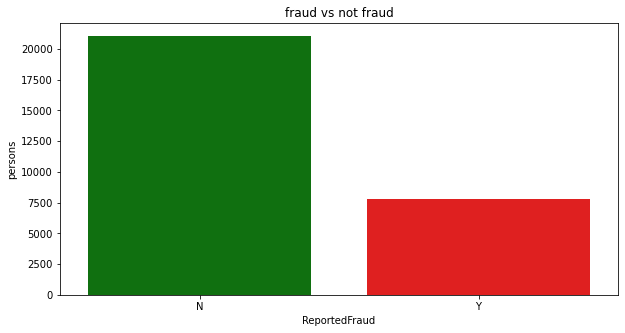

In [39]:
# Target Variable Countplot
#sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(train_df['ReportedFraud'], palette= ['green','red'])
plt.title('fraud vs not fraud')
plt.ylabel('persons')
plt.show()

In [40]:
train_df['ReportedFraud'].value_counts(normalize= True)*100

N    73.002497
Y    26.997503
Name: ReportedFraud, dtype: float64

In [41]:
date_col = [feature for feature in train_df.columns if 'date' in feature or 'Date' in feature]
date_col

['DateOfIncident', 'DateOfPolicyCoverage']

In [42]:
discrete_feature = [feature for feature in num_feature if len(train_df[feature].unique())<15 and feature not in ['CustomerID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [43]:
train_df[discrete_feature].head()

,DateOfIncident,NumberOfVehicles,BodilyInjuries,DateOfPolicyCoverage
0,1,3,1,11
1,2,1,1,8
2,1,3,0,6
3,1,3,2,1
4,2,3,1,9


In [44]:
continuous_feature=[feature for feature in num_feature if feature  not in discrete_feature+date_col+['CustomerID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 13


In [45]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

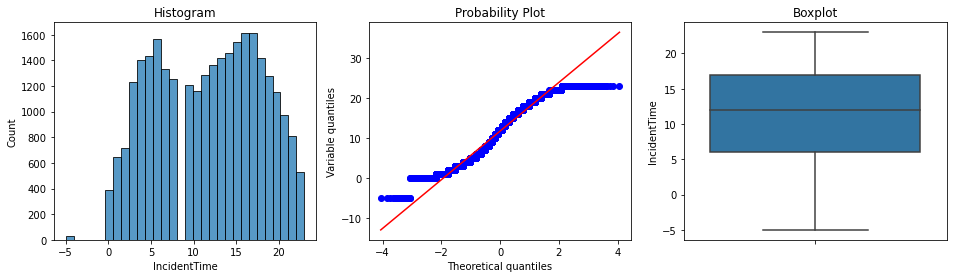

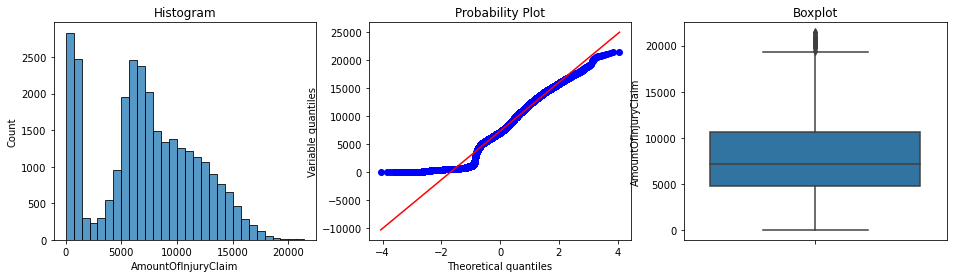

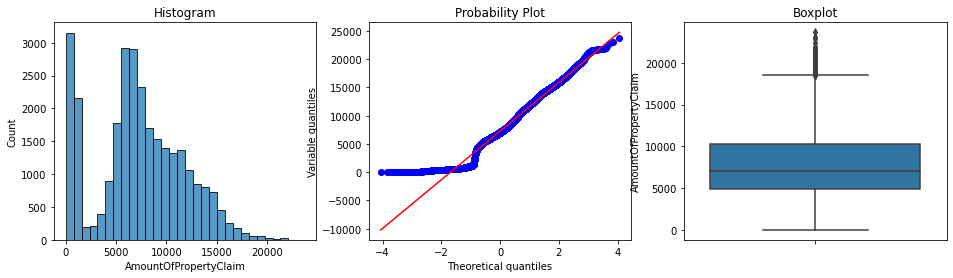

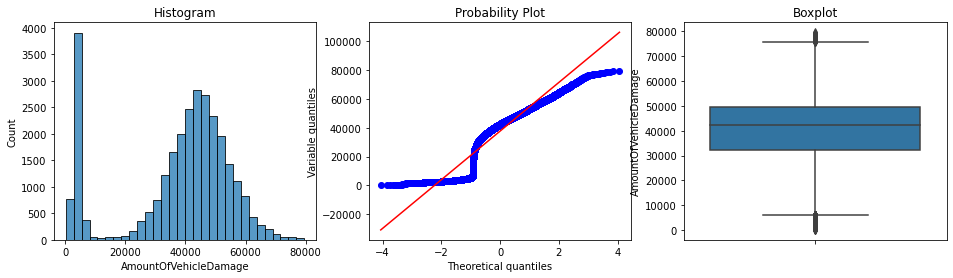

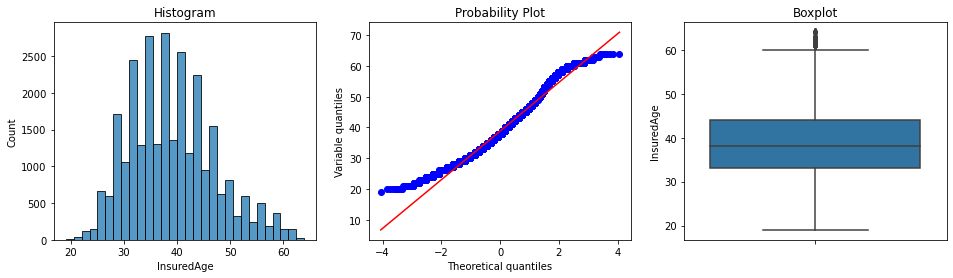

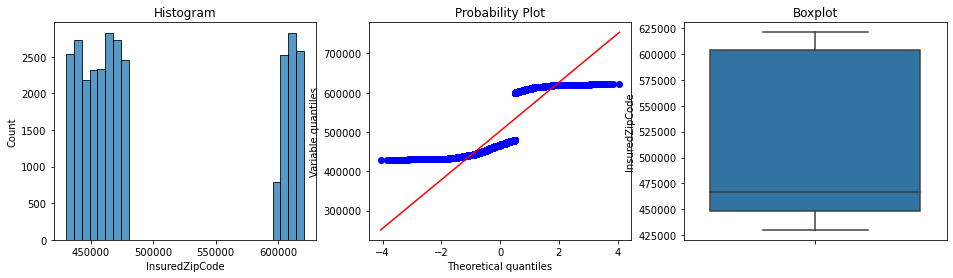

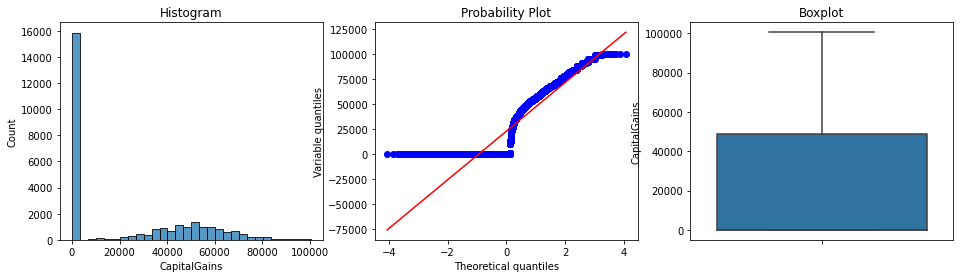

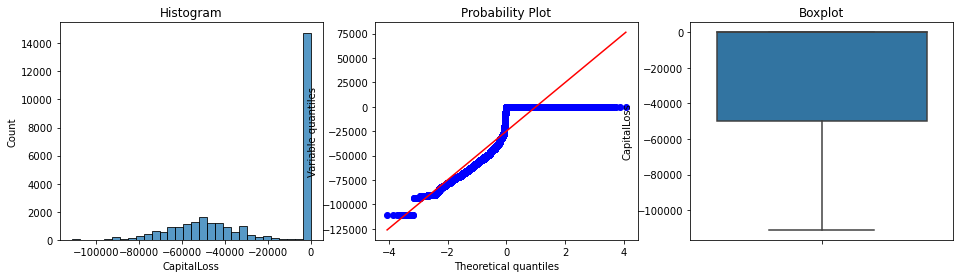

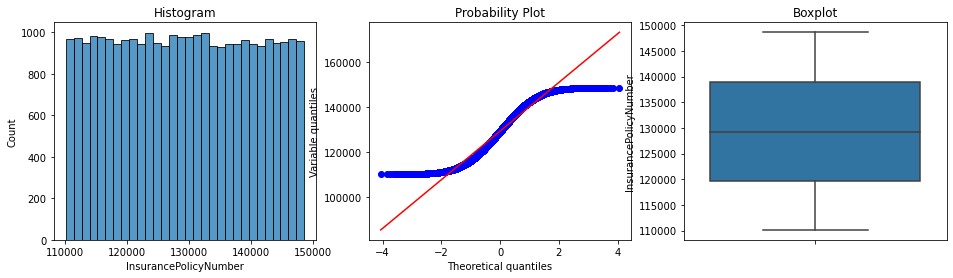

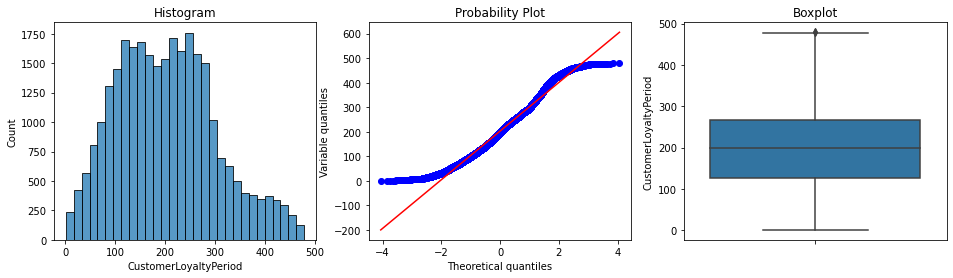

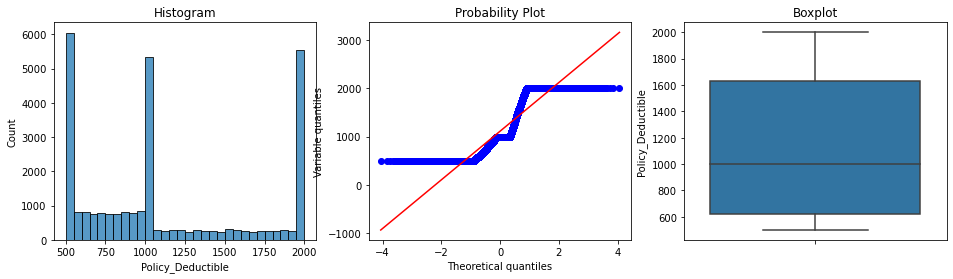

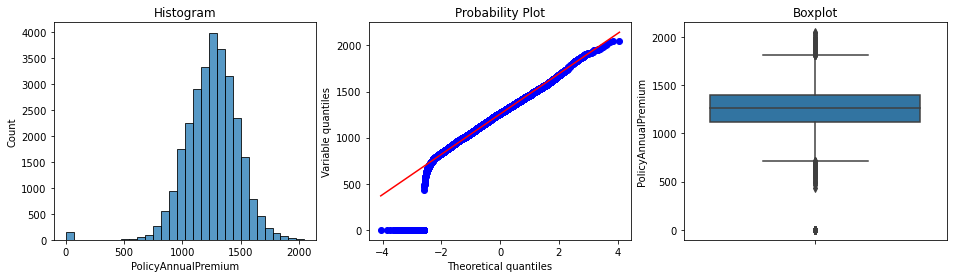

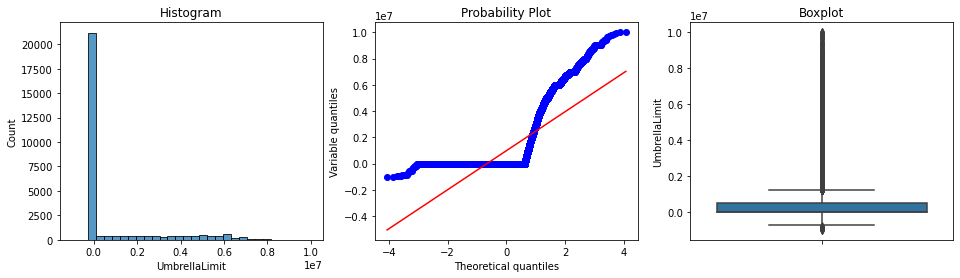

In [46]:
for feature in continuous_feature :

    diagnostic_plots(train_df, feature)


# Outlier treatment

In [47]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [48]:
train_df.shape

(28836, 46)

In [49]:
#negative part of prices
final_neg =train_df[train_df['AmountOfInjuryClaim']<0]

#positive part of prices
final_pos =train_df[train_df['AmountOfInjuryClaim']>0]

final_pos
final_neg

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4


In [50]:
#getting minimums of each 
#minimum_neg = final_neg.loc[final_neg['AmountOfInjuryClaim'].idxmin()]['AmountOfInjuryClaim']
minimum_pos= final_pos.loc[final_pos['AmountOfInjuryClaim'].idxmax()]['AmountOfInjuryClaim']
minimum_pos

21450

In [51]:
train_df['AmountOfInjuryClaim'].idxmin()

1369

In [52]:
train_df['AmountOfInjuryClaim'].idxmax()

23004

In [53]:
# let's flag the outliers in the data set


A_upper_limit, A_lower_limit = find_skewed_boundaries(train_df, 'AmountOfInjuryClaim', 1.5)
print(A_upper_limit, A_lower_limit)
outliers_AmountOfInjuryClaim = np.where(train_df['AmountOfInjuryClaim'] > A_upper_limit, True,
                       np.where(train_df['AmountOfInjuryClaim'] < A_lower_limit, True, False))

19312.5 -3997.5


In [54]:
len(outliers_AmountOfInjuryClaim == True)

28836

In [55]:
B_upper_limit, B_lower_limit = find_skewed_boundaries(train_df, 'AmountOfPropertyClaim', 1.5)
print(B_upper_limit, B_lower_limit)
outliers_AmountOfPropertyClaim = np.where(train_df['AmountOfPropertyClaim'] > B_upper_limit, True,
                       np.where(train_df['AmountOfPropertyClaim'] < B_lower_limit, True, False))

18524.5 -3335.5


In [56]:
len(outliers_AmountOfPropertyClaim==False)

28836

In [57]:
C_upper_limit, C_lower_limit = find_skewed_boundaries(train_df, 'PolicyAnnualPremium', 1.5)
print(C_upper_limit, C_lower_limit)
outliers_PolicyAnnualPremium = np.where(train_df['PolicyAnnualPremium'] > C_upper_limit, True,
                       np.where(train_df['PolicyAnnualPremium'] < C_lower_limit, True, False))

1808.5012500000003 710.1112499999998


In [58]:
D_upper_limit, D_lower_limit = find_skewed_boundaries(train_df, 'UmbrellaLimit', 1.5)
print(D_upper_limit, D_lower_limit)
outliers_UmbrellaLimit = np.where(train_df['UmbrellaLimit'] > D_upper_limit, True,
                       np.where(train_df['UmbrellaLimit'] < D_lower_limit, True, False))

1214902.5 -728941.5


In [59]:

train_df_trimmed = train_df.loc[~(outliers_AmountOfInjuryClaim + outliers_AmountOfPropertyClaim + outliers_PolicyAnnualPremium+outliers_UmbrellaLimit), ]

train_df.shape, train_df_trimmed.shape

((28836, 46), (21856, 46))

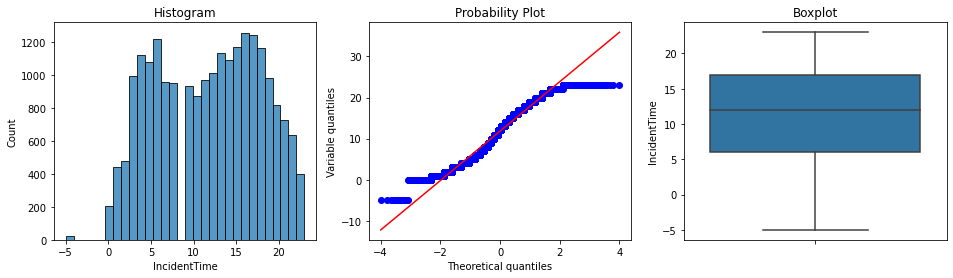

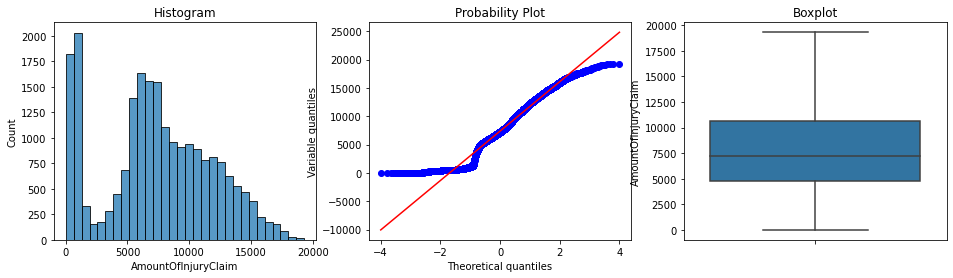

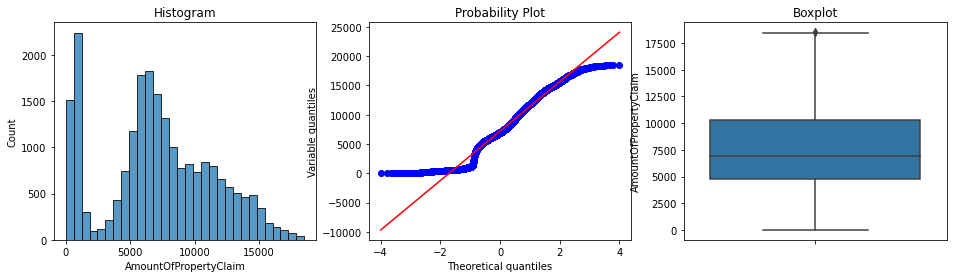

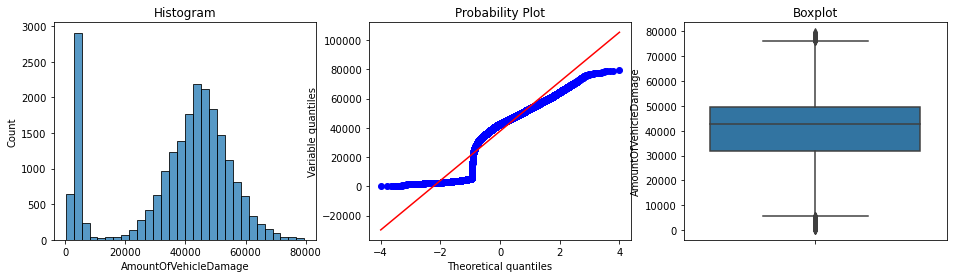

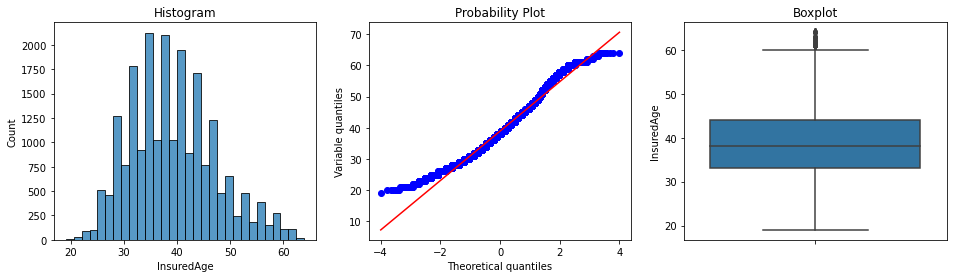

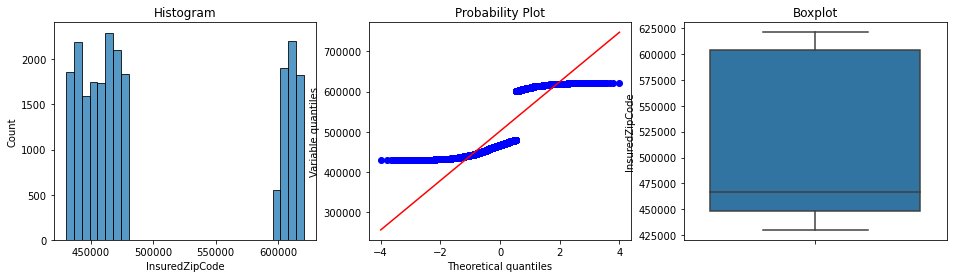

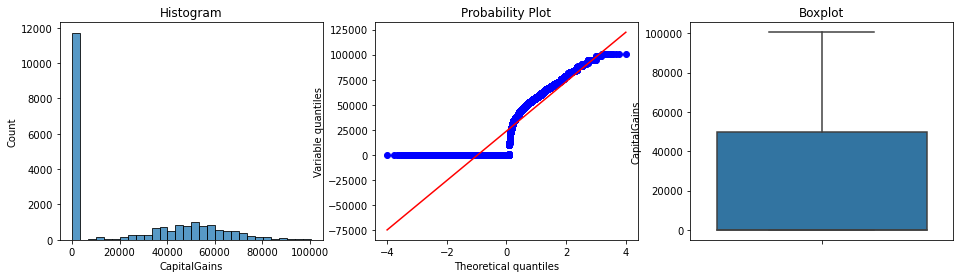

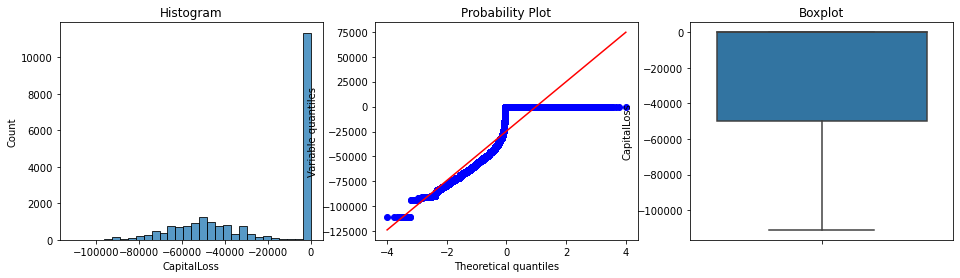

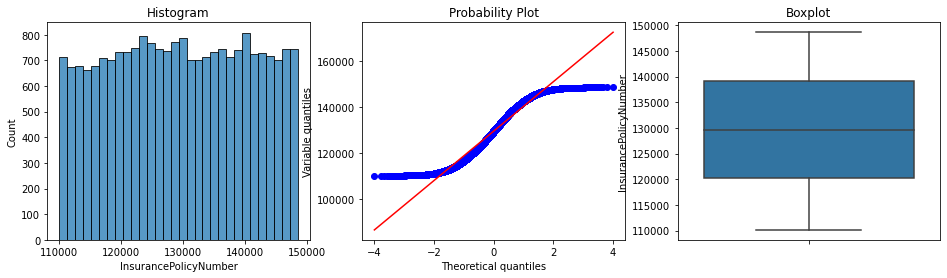

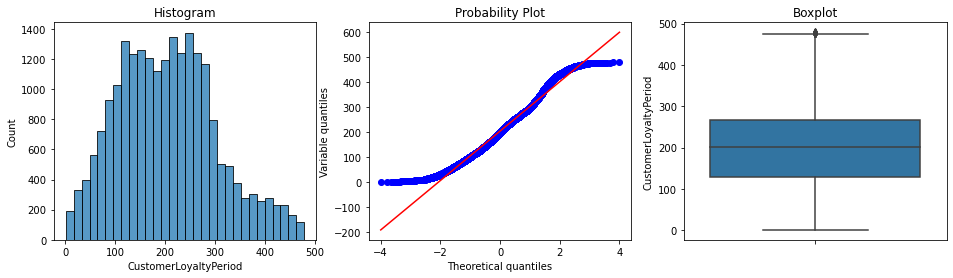

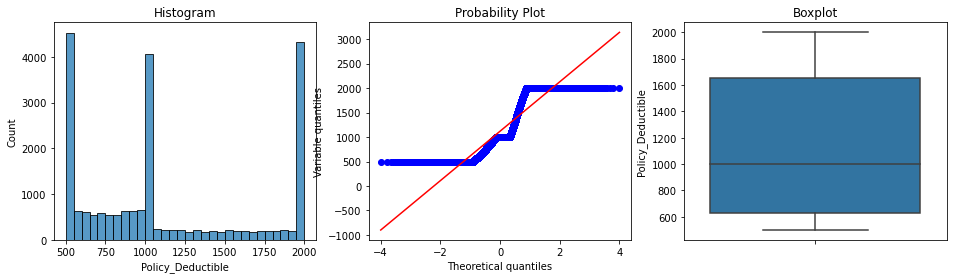

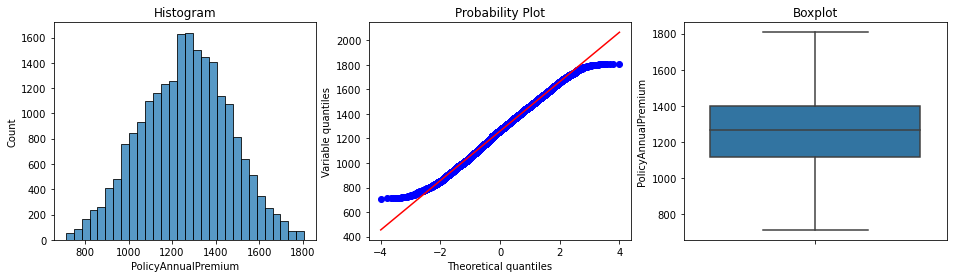

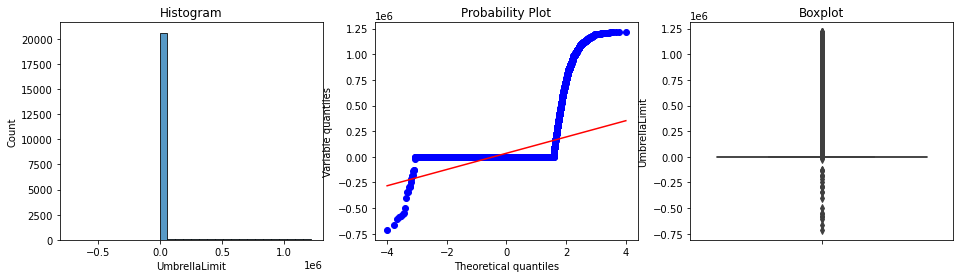

In [60]:
for feature in continuous_feature :

    diagnostic_plots(train_df_trimmed, feature)

In [61]:
from feature_engine.outliers import Winsorizer

In [62]:
# create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['AmountOfInjuryClaim','AmountOfPropertyClaim','PolicyAnnualPremium',
                                     'UmbrellaLimit','AmountOfVehicleDamage'])

windsoriser.fit(train_df)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['AmountOfInjuryClaim', 'AmountOfPropertyClaim',
                      'PolicyAnnualPremium', 'UmbrellaLimit',
                      'AmountOfVehicleDamage'])

In [63]:
train_df_capping = windsoriser.transform(train_df)

In [64]:
windsoriser.left_tail_caps_

{'AmountOfInjuryClaim': -3997.5,
 'AmountOfPropertyClaim': -3335.5,
 'PolicyAnnualPremium': 710.1112499999998,
 'UmbrellaLimit': -728941.5,
 'AmountOfVehicleDamage': 6179.5}

In [65]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{'AmountOfInjuryClaim': 19312.5,
 'AmountOfPropertyClaim': 18524.5,
 'PolicyAnnualPremium': 1808.5012500000003,
 'UmbrellaLimit': 1214902.5,
 'AmountOfVehicleDamage': 75549.5}

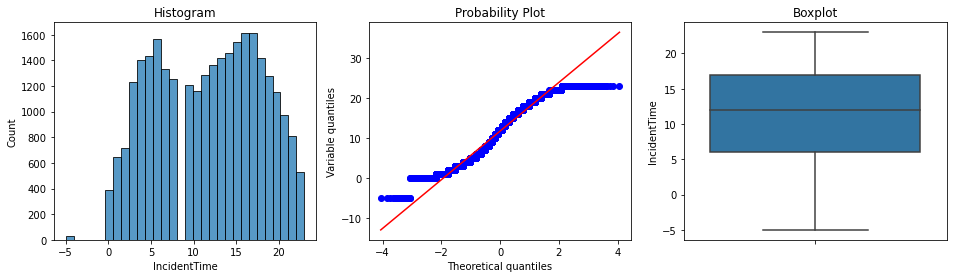

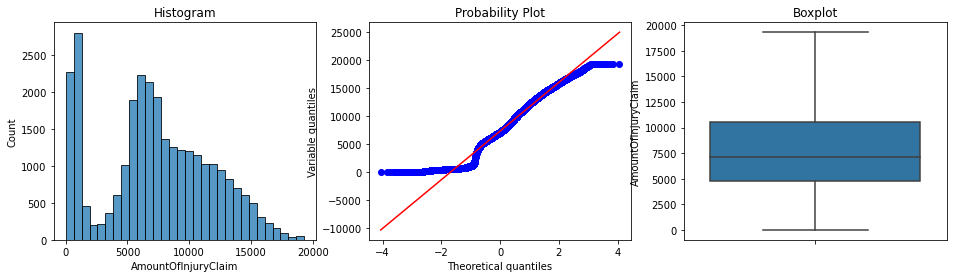

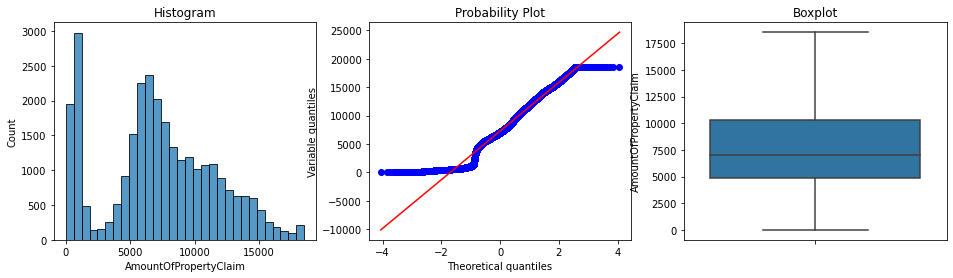

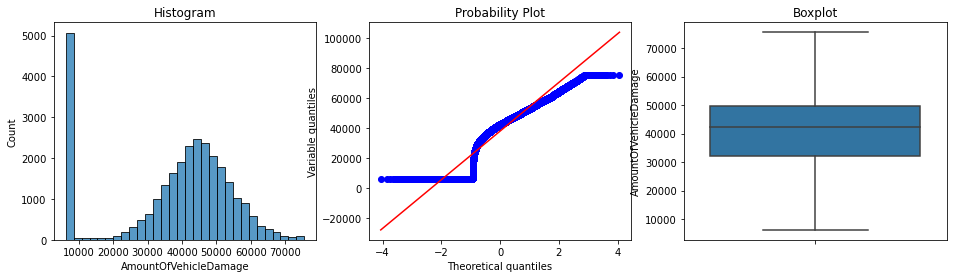

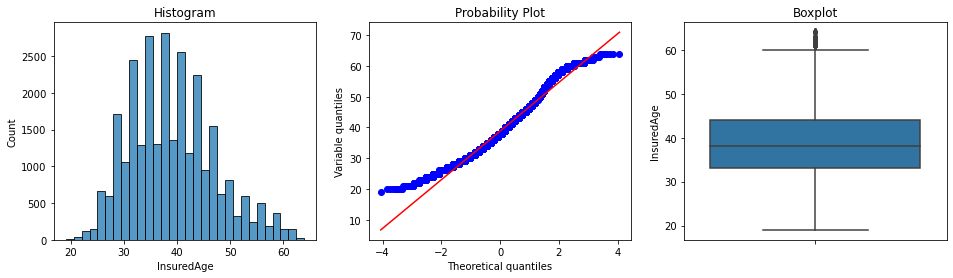

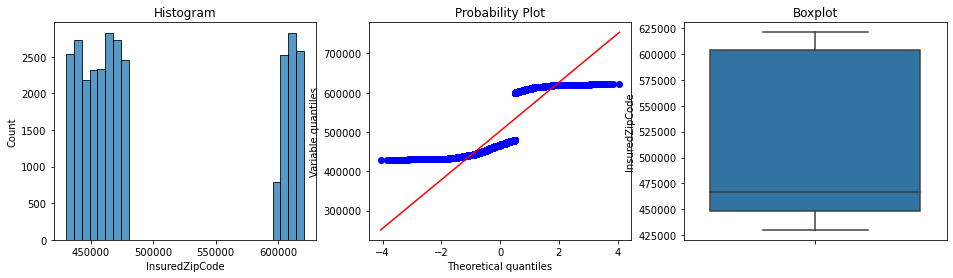

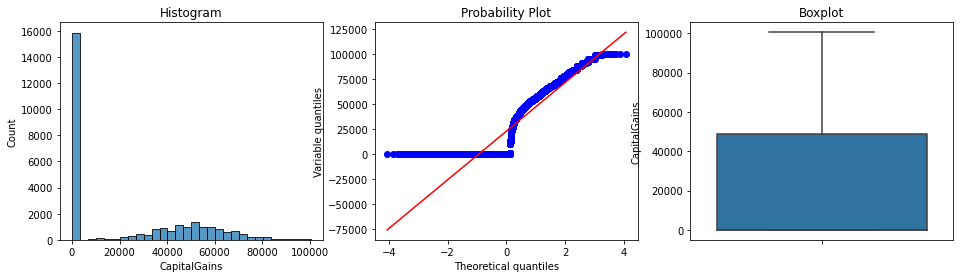

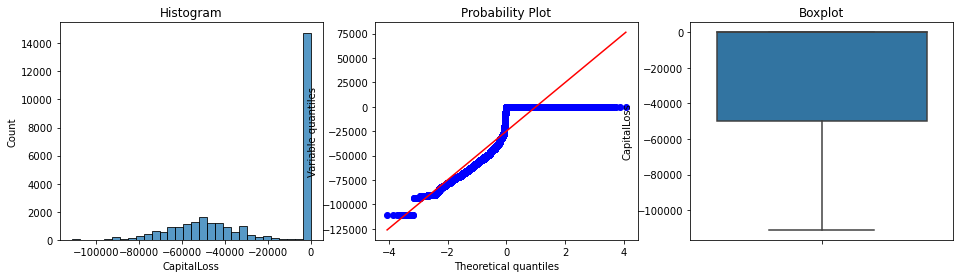

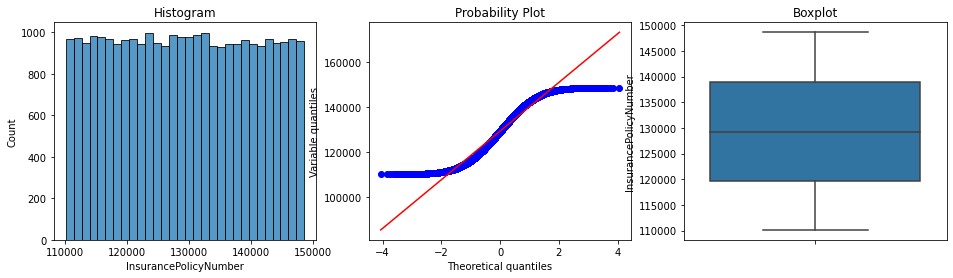

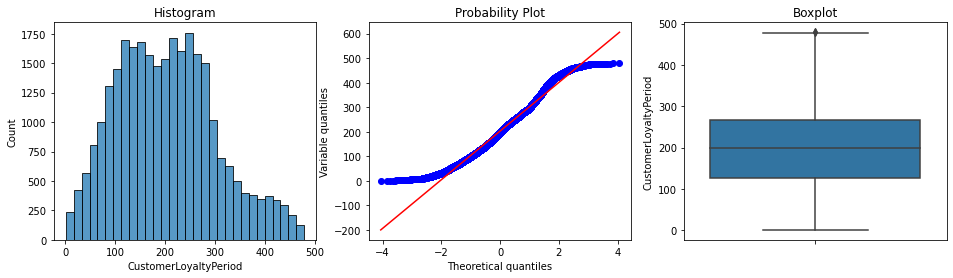

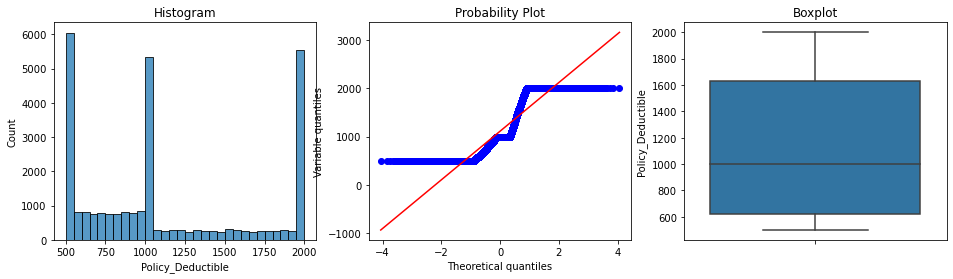

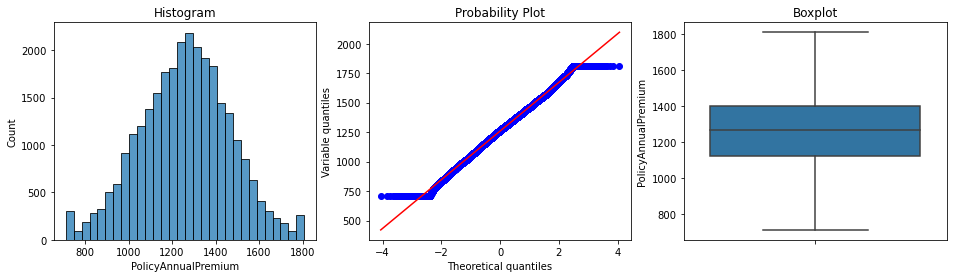

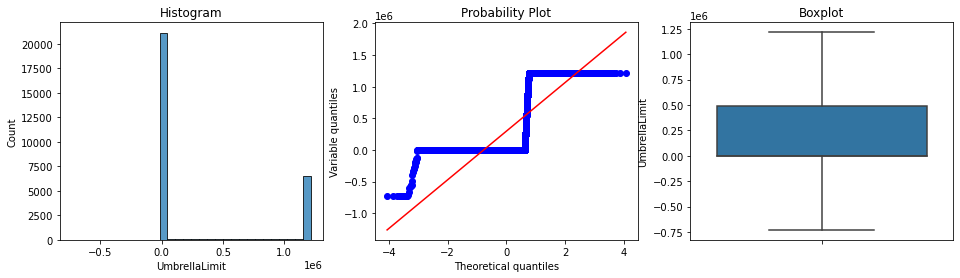

In [66]:
for feature in continuous_feature :

    diagnostic_plots(train_df_capping, feature)

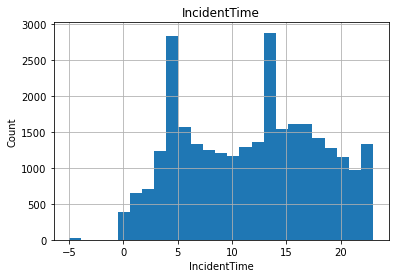

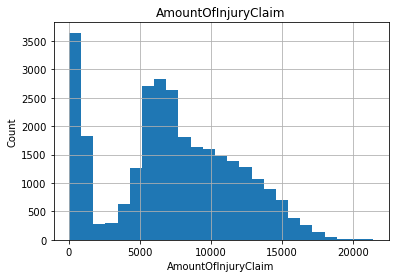

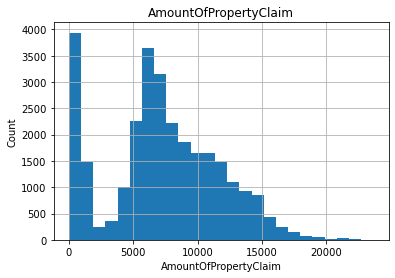

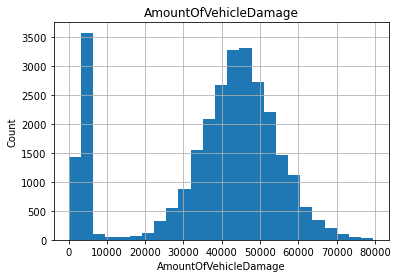

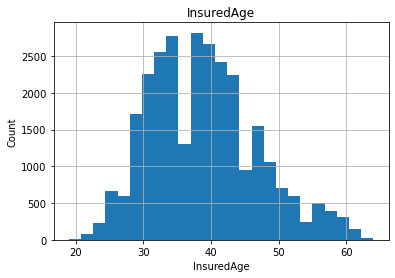

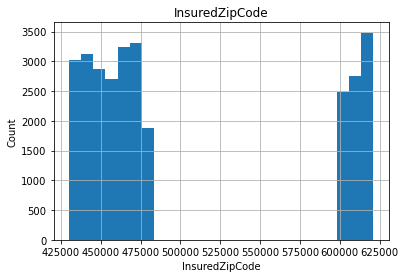

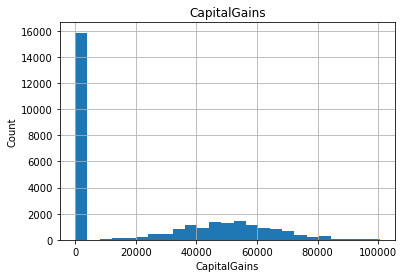

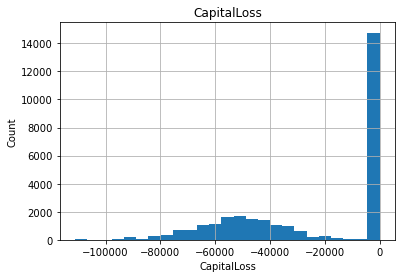

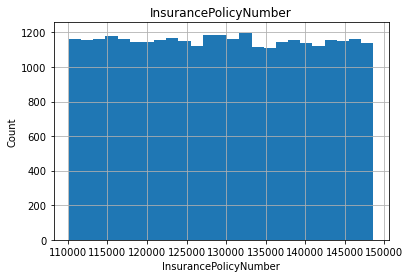

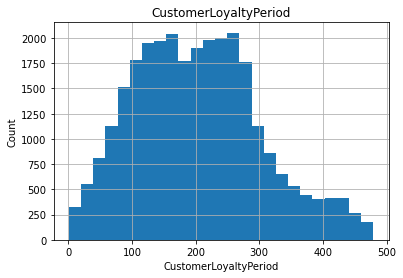

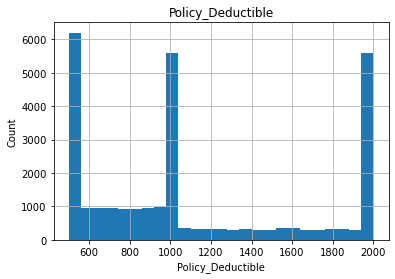

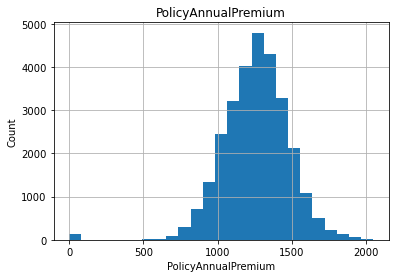

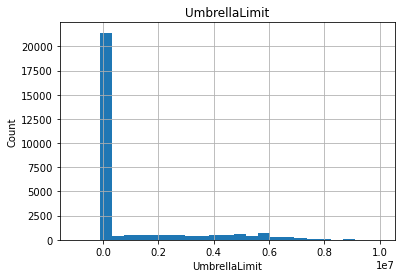

In [67]:

for feature in continuous_feature:
    data=train_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Log normalization

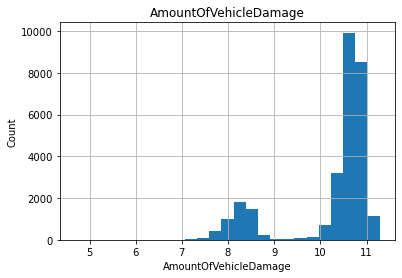

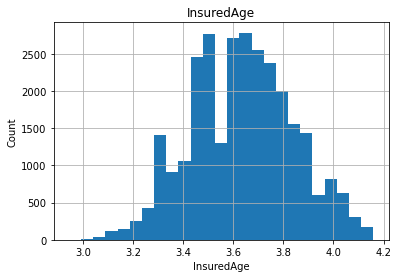

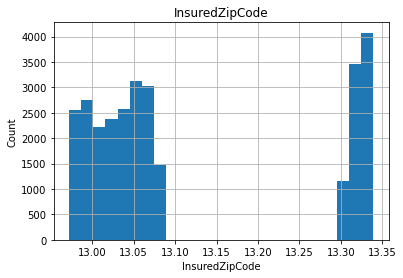

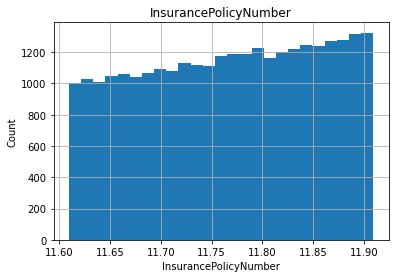

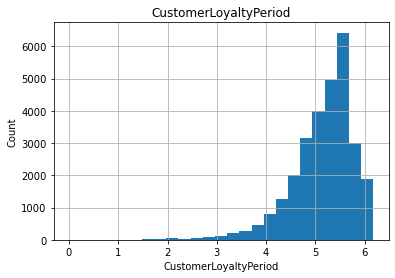

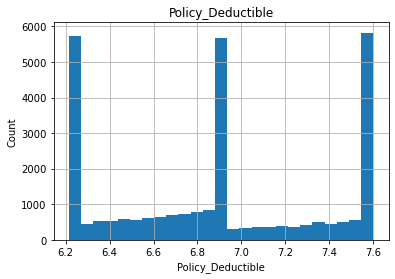

C:\Users\pramod\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


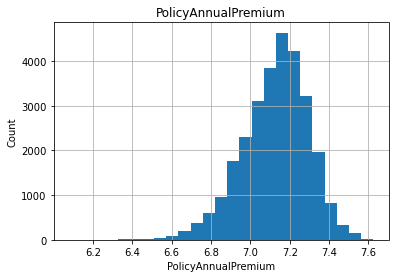

In [68]:
for feature in continuous_feature:
    data=train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()
        

# Box plot

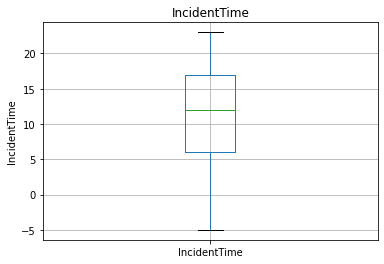

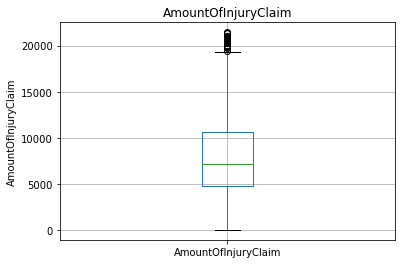

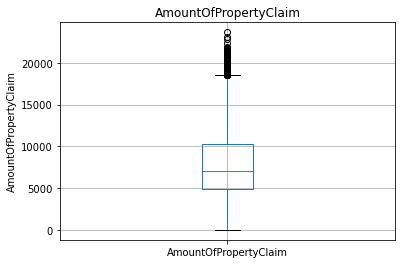

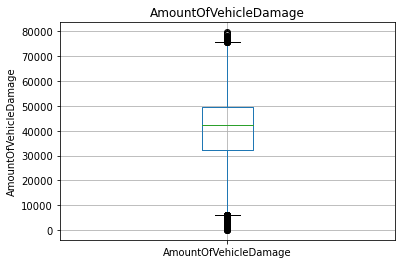

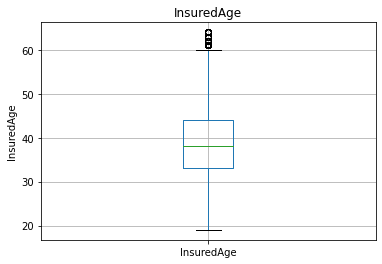

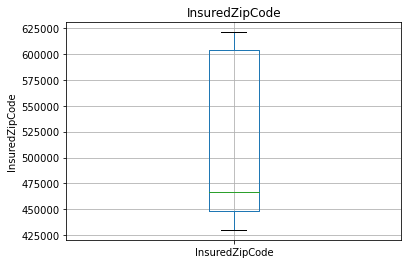

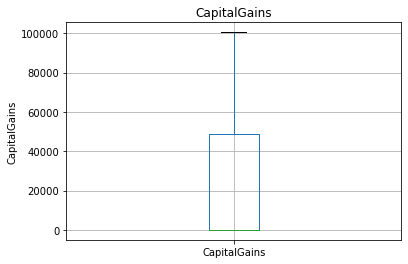

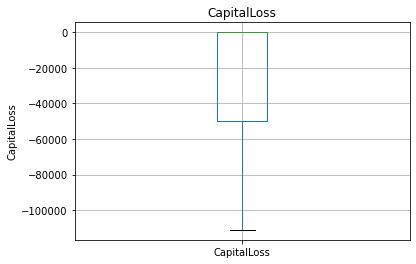

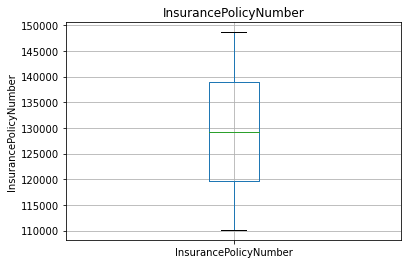

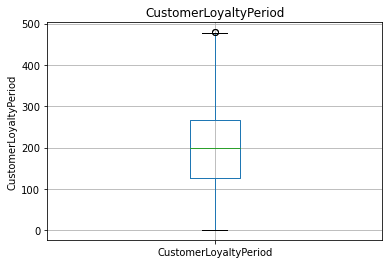

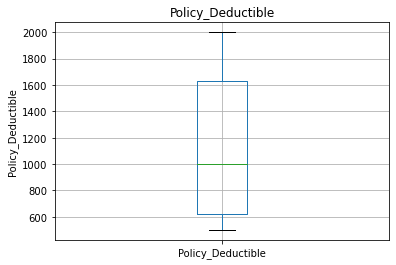

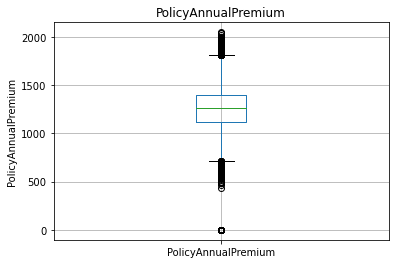

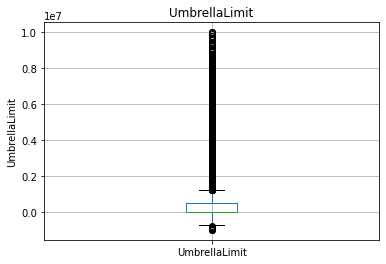

In [69]:
for feature in continuous_feature:
    data=train_df.copy()
    #if 0 in data[feature].unique():
      #  pass
    #else:
        #data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)       
    plt.title(feature)
    plt.show()

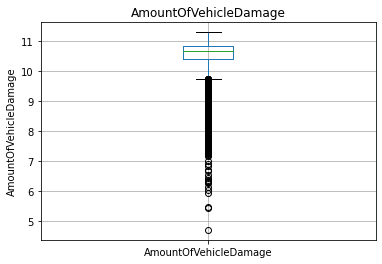

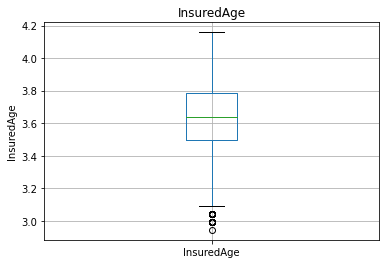

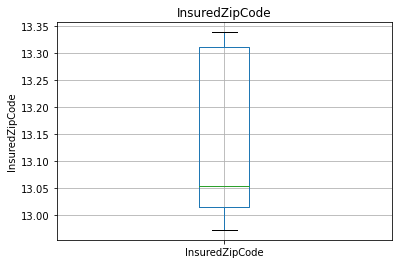

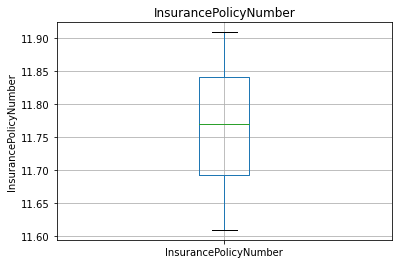

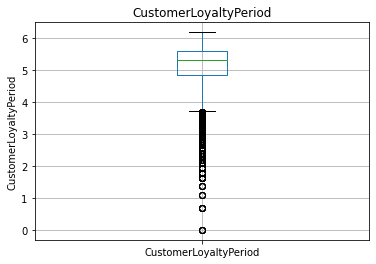

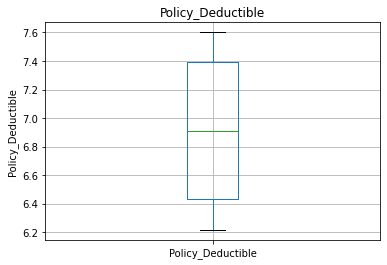

C:\Users\pramod\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


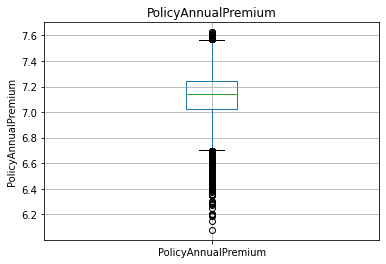

In [70]:
for feature in continuous_feature:
    data=train_df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [71]:
cat_var = [feature for feature in cat_feature if feature not in date_col+['CustomerID','VehicleAttributeDetails1','IncidentAddress','AmountOfTotalClaim',]]
for col in cat_var:
    print(col)
    print(train_df[col].nunique())

ReportedFraud
2
TypeOfIncident
4
TypeOfCollission
3
SeverityOfIncident
4
AuthoritiesContacted
5
IncidentState
7
IncidentCity
7
PropertyDamage
2
Witnesses
5
PoliceReport
2
InsuredGender
2
InsuredEducationLevel
7
InsuredOccupation
14
InsuredHobbies
20
Country
1
InsurancePolicyState
3
Policy_CombinedSingleLimit
9
InsuredRelationship
6
VehicleAttribute1
1
VehicleAttribute2
1
VehicleAttributeDetails2
39
VehicleAttribute3
1
VehicleAttributeDetails3
15
VehicleAttribute4
1
VehicleAttributeDetails4
21


# Countplot for categorical features 

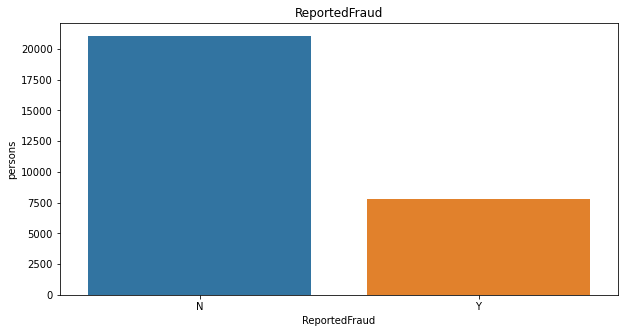

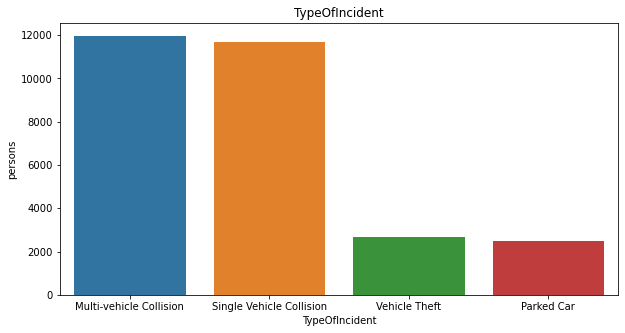

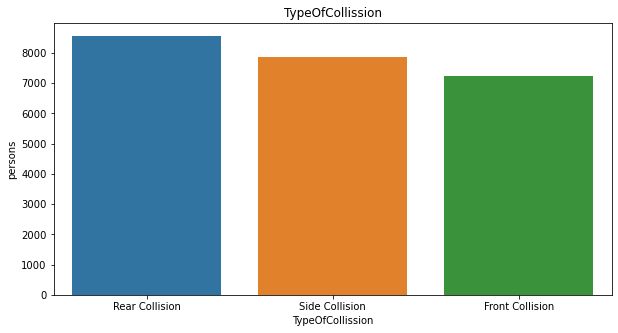

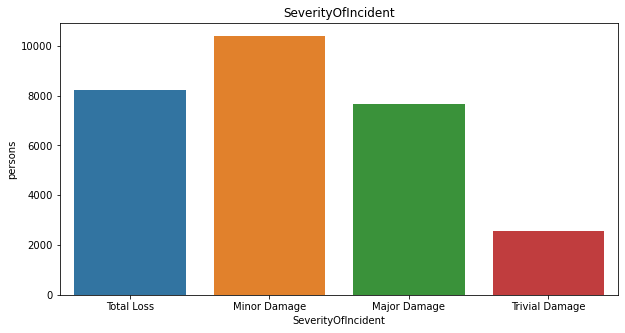

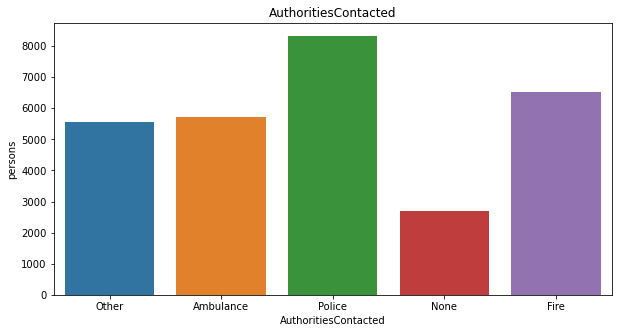

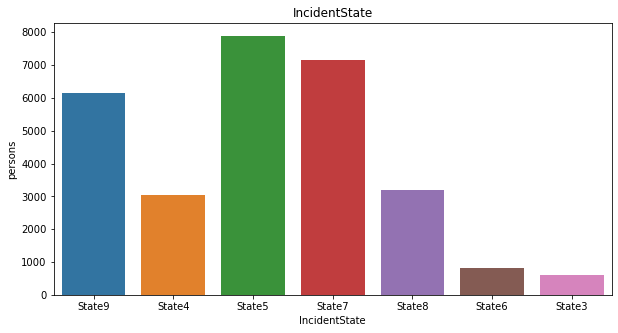

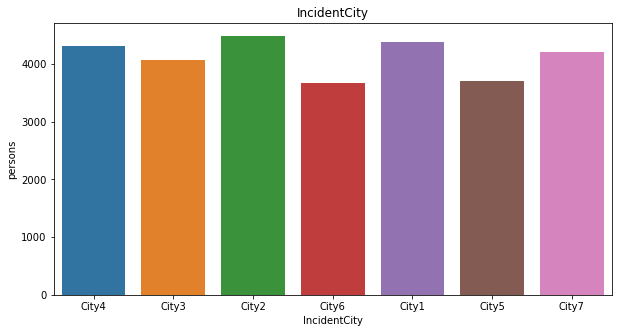

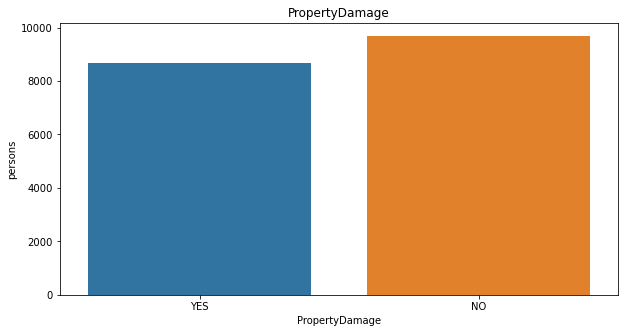

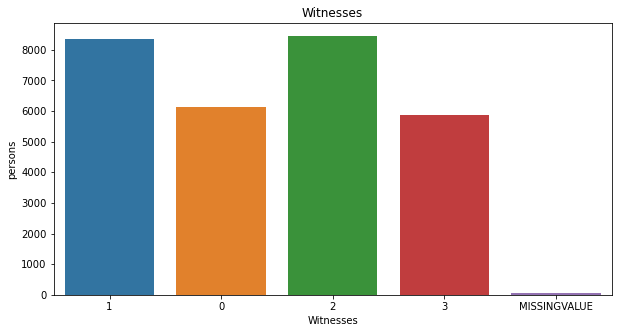

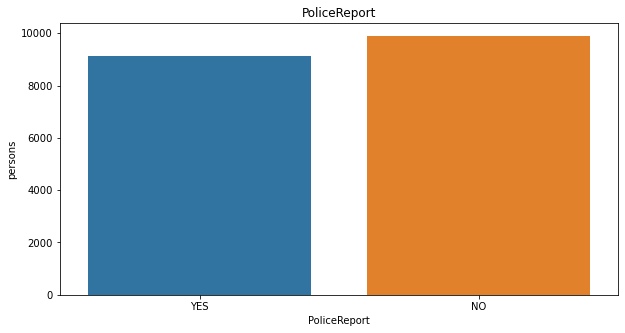

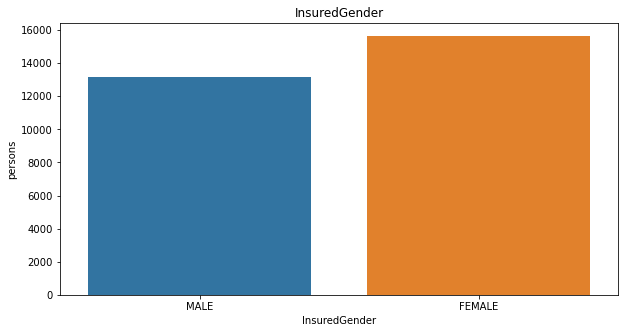

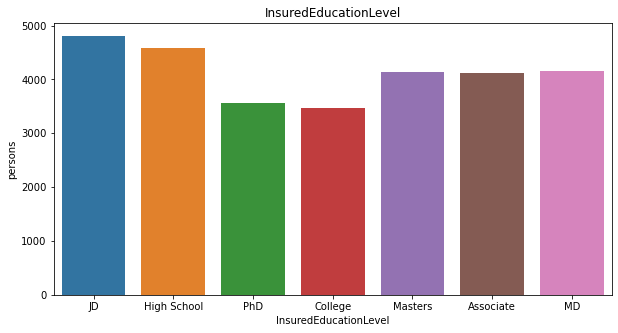

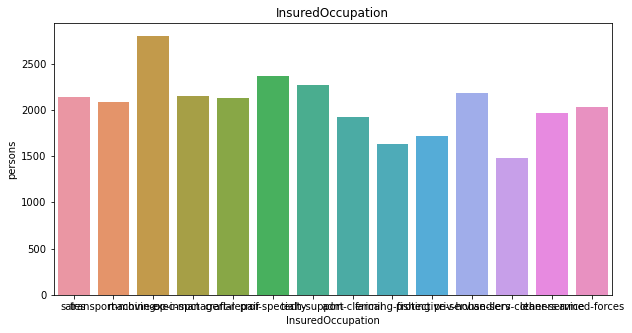

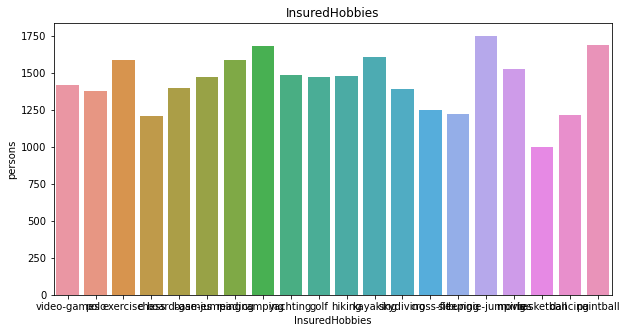

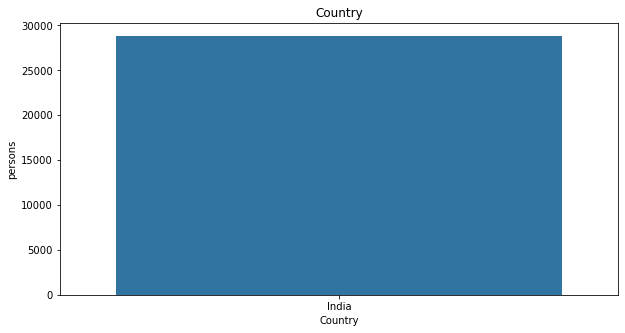

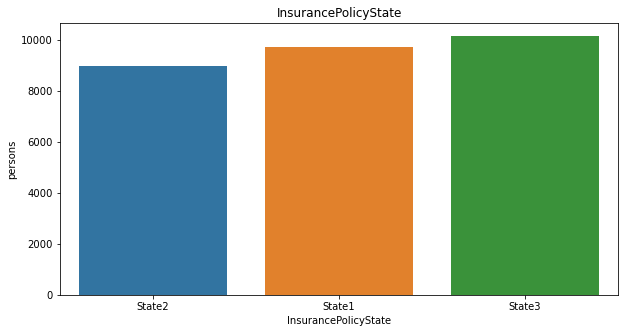

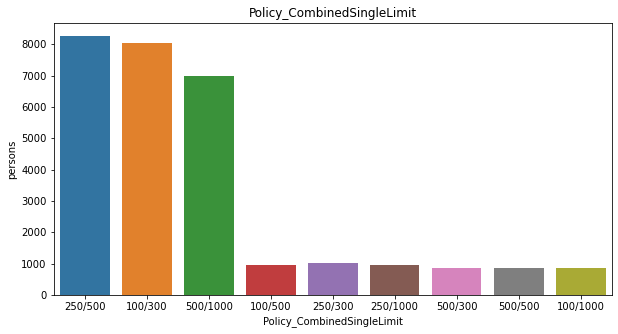

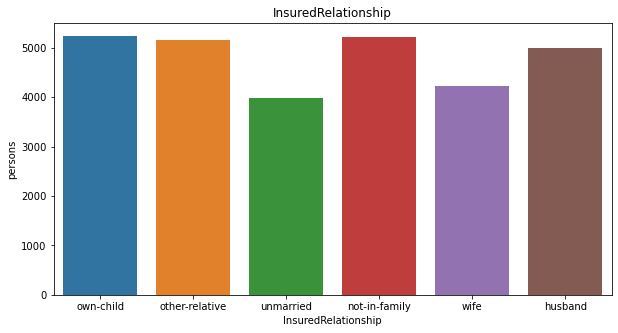

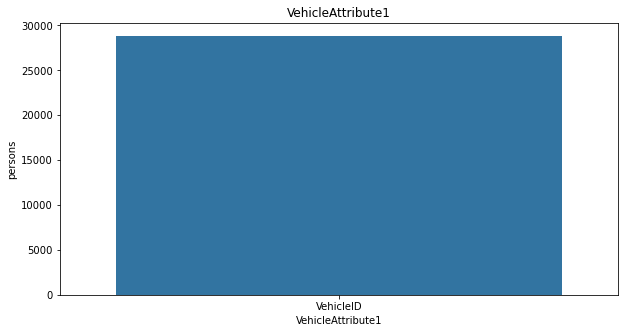

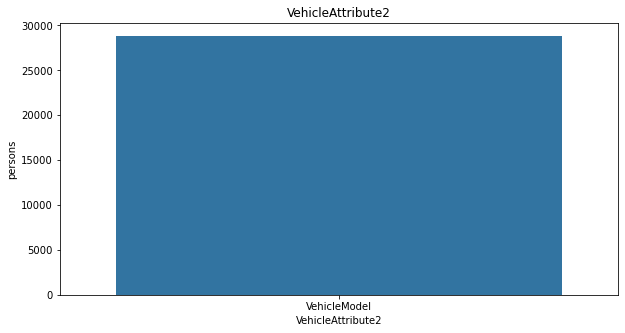

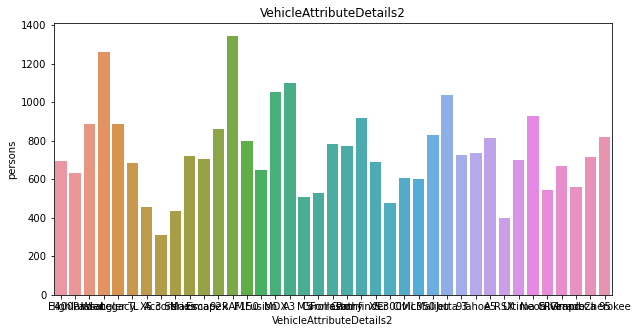

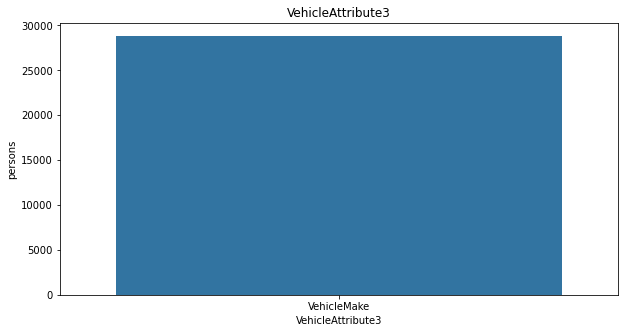

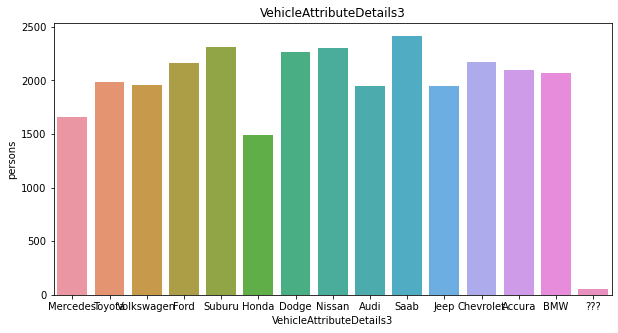

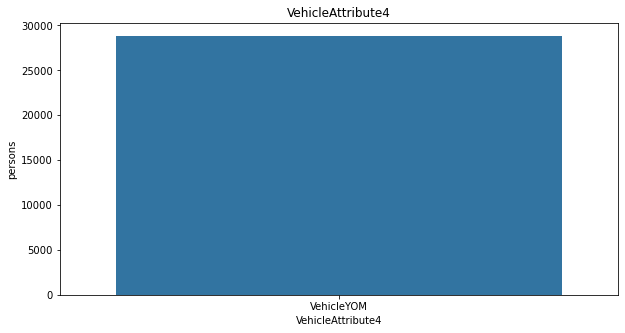

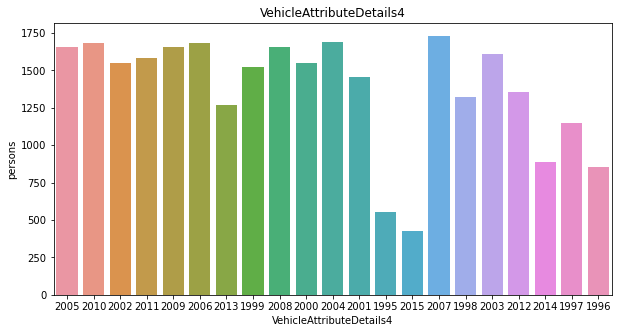

In [72]:
for col in cat_var :
    data = train_df.copy()
    plt.figure(figsize = (10,5))
    sns.countplot(x = col, data = train_df)
    plt.title(col)
    plt.ylabel('persons')
    plt.show()

In [73]:
first_dimension = "TypeOfIncident"
horizontal_label = "x label"
second_dimension = "ReportedFraud"

C:\Users\pramod\AppData\Local\Temp/ipykernel_20864/3304360477.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,5))


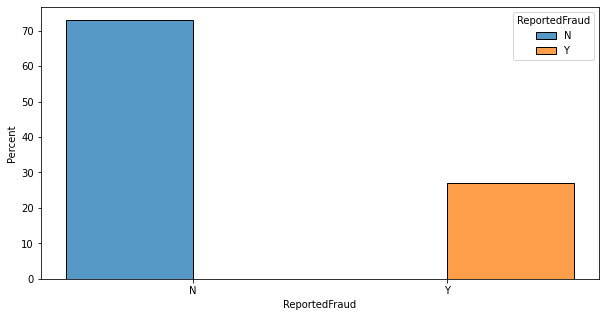

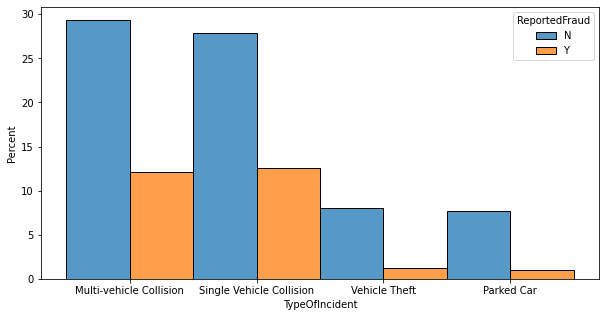

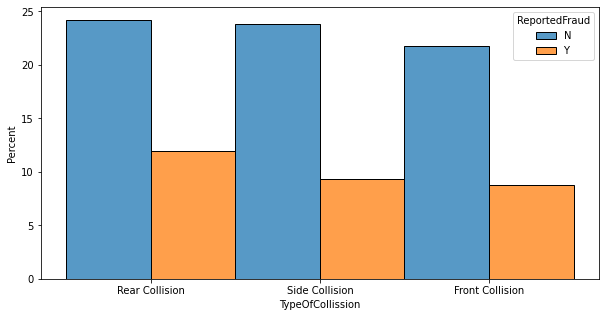

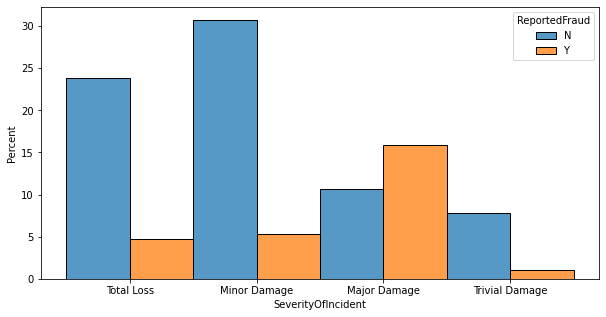

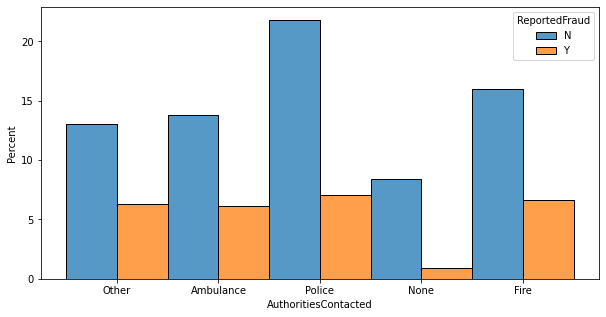

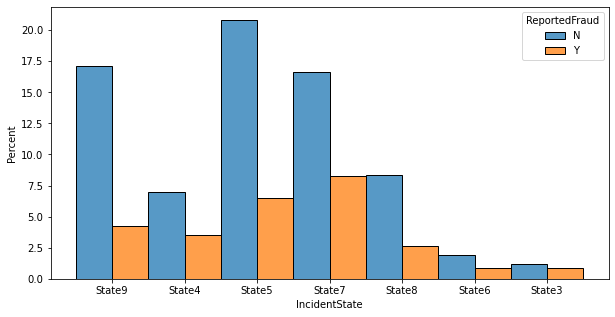

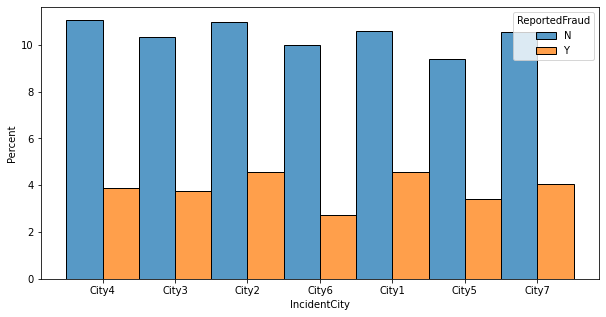

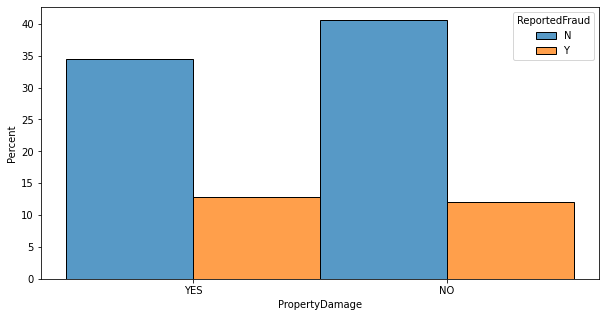

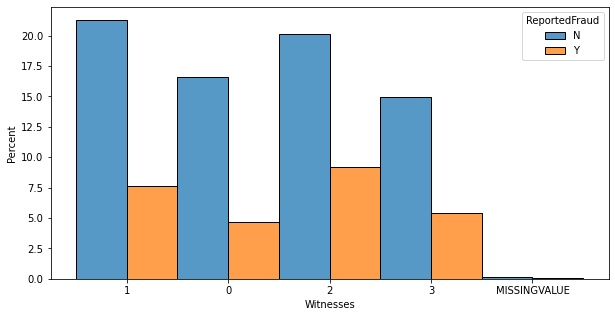

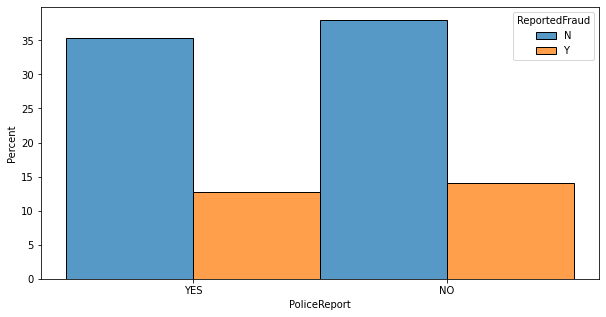

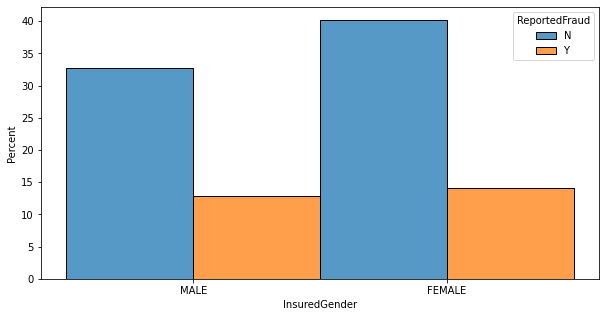

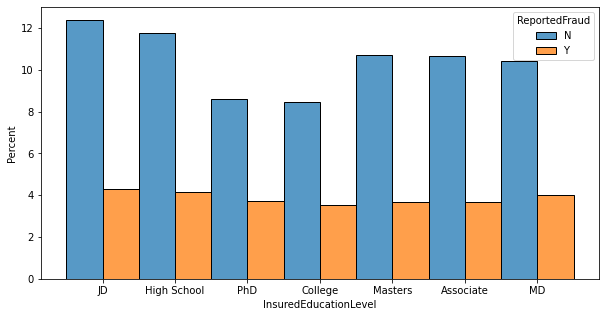

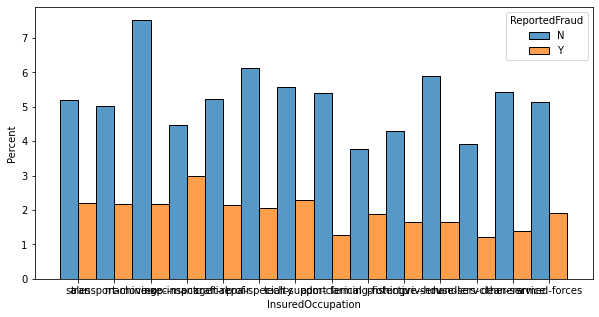

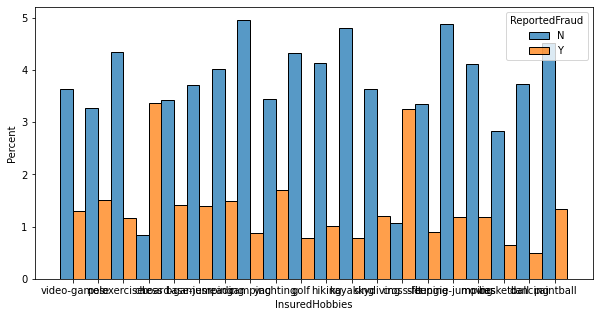

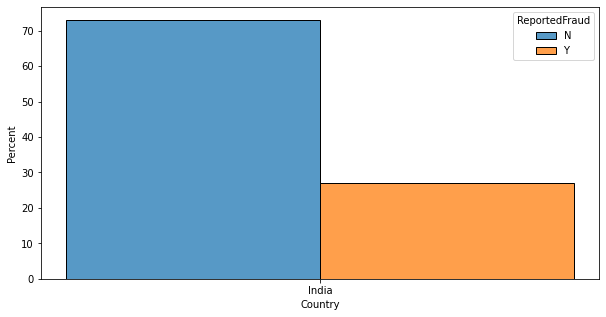

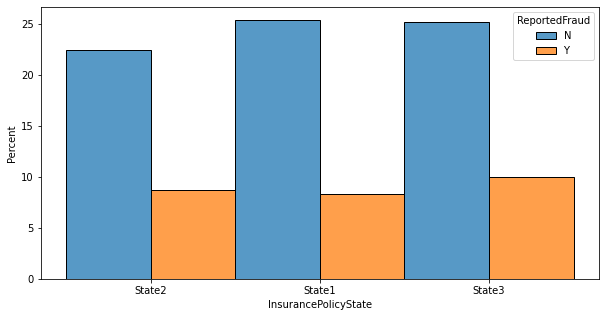

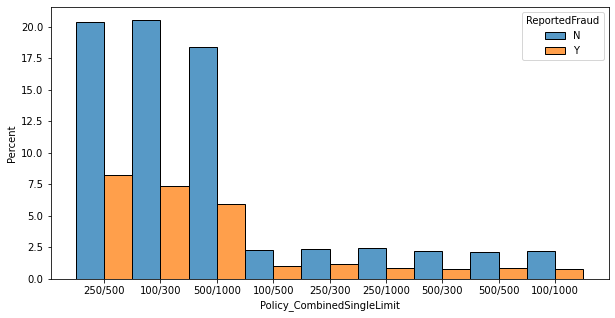

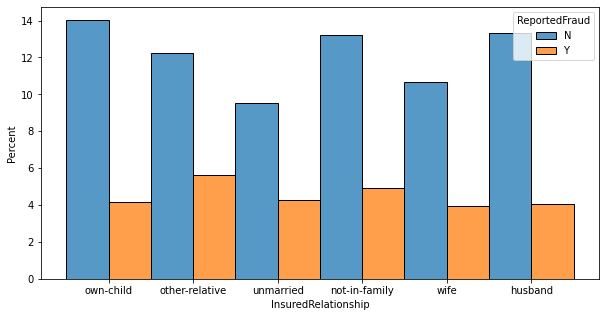

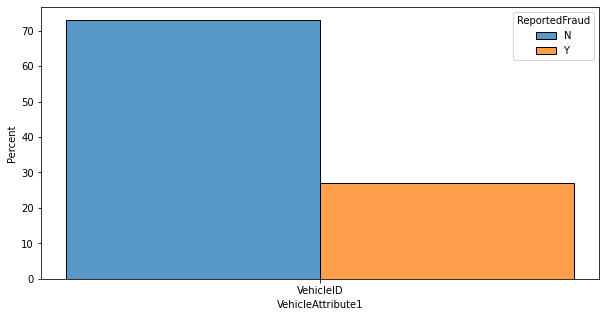

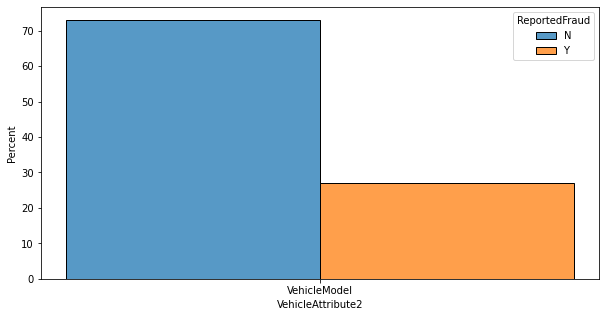

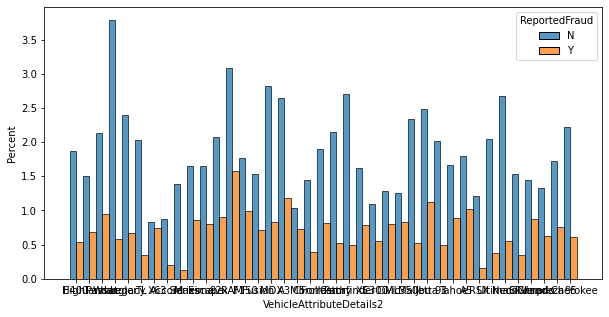

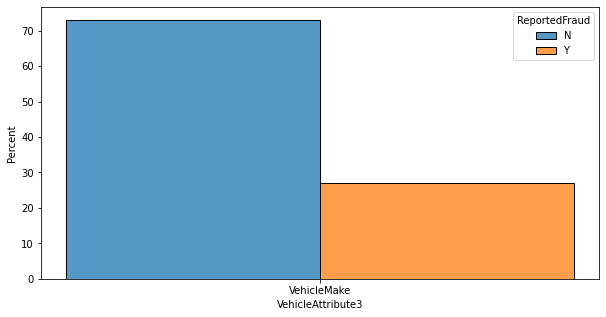

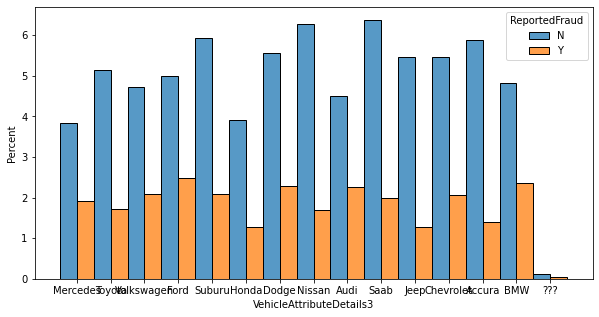

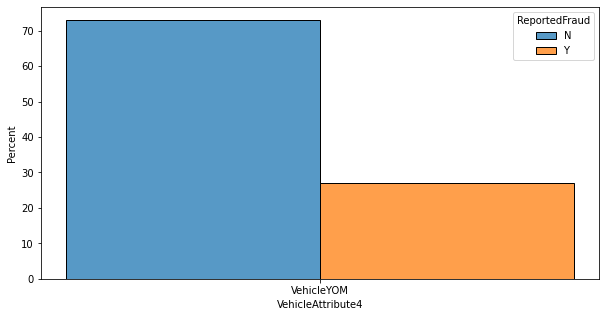

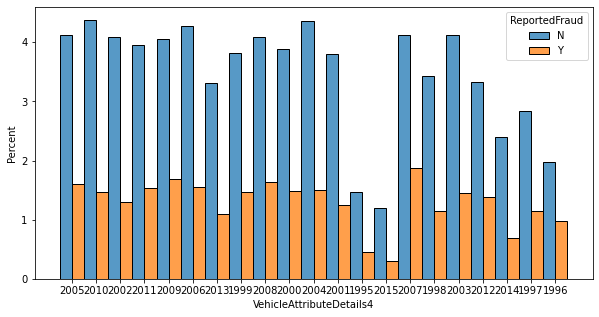

In [74]:
for feature in cat_var:
    
    plt.figure(figsize = (10,5))

    sns.histplot(binwidth=1,
    x= feature,
    hue="ReportedFraud",
    data=train_df,
    #hue_norm = True,
    stat="percent",
    
    multiple="dodge")

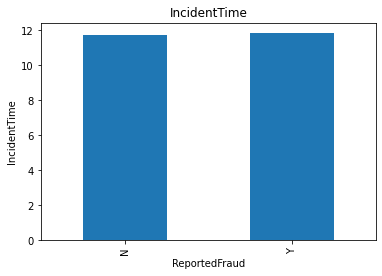

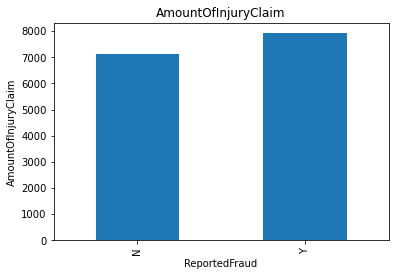

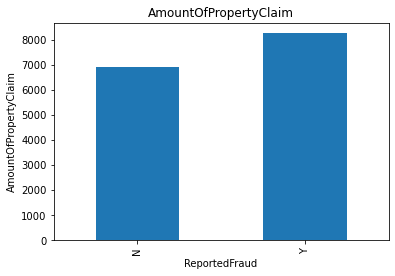

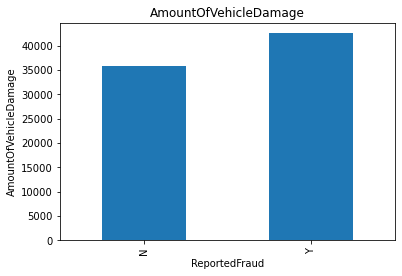

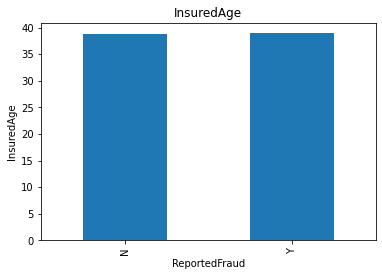

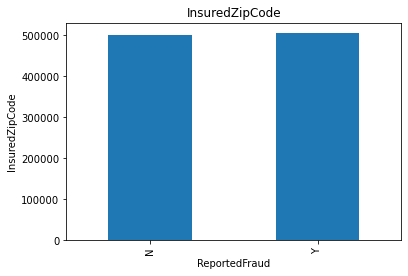

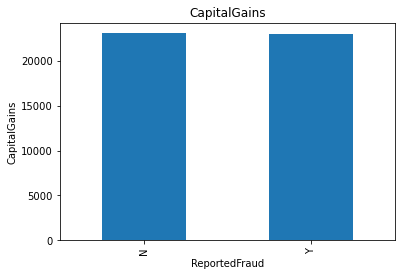

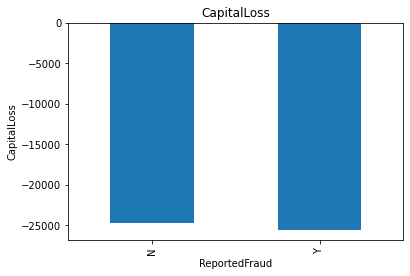

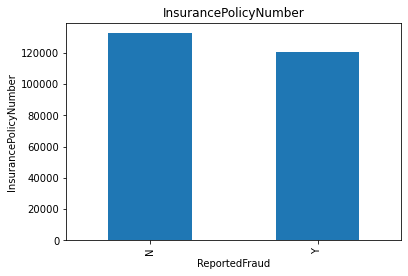

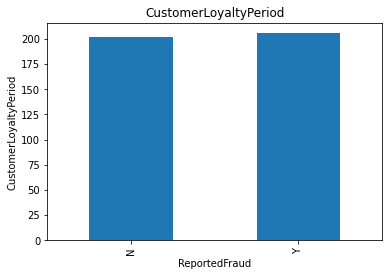

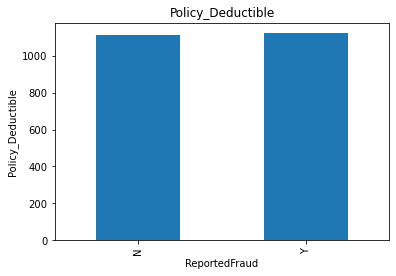

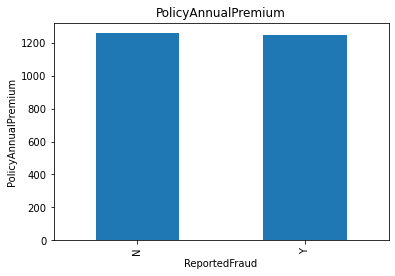

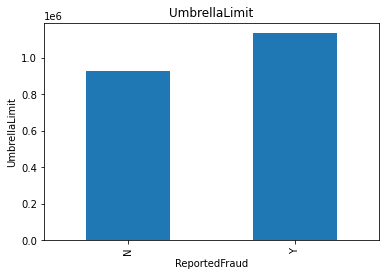

In [75]:

for feature in continuous_feature:
    data=train_df.copy()
    data.groupby('ReportedFraud')[feature].mean().plot.bar()
    plt.xlabel('ReportedFraud')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [76]:
a = train_df.groupby('ReportedFraud')['UmbrellaLimit']
for i , val in a:
    print(val.nunique())


4768
2335


In [77]:
train_df = train_df.replace({'ReportedFraud': {'Y': 1, 
                                'N': 0}})

In [78]:
train_df.head()

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
0,Cust20065,0,1,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,19,3,NaN,1,1,NaN,43973,9396,4698,29879,58,471784,MALE,JD,sales,video-games,0,-42700,India,129186,432,11,State2,250/500,2000,1142.87,0,own-child,VehicleID,Vehicle30662,VehicleModel,E400,VehicleMake,Mercedes,VehicleYOM,2005
1,Cust37589,0,2,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,1,NaN,1,1,YES,62310,6539,6539,49232,34,431937,FEMALE,High School,transport-moving,polo,51300,0,India,146710,128,8,State2,100/300,1000,1274.38,2857344,own-child,VehicleID,Vehicle17183,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2010
2,Cust24312,0,1,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,3,NaN,0,0,NaN,42824,6069,6069,30686,52,479320,FEMALE,PhD,machine-op-inspct,exercise,0,0,India,133433,346,6,State1,500/1000,745,1269.93,0,other-relative,VehicleID,Vehicle33982,VehicleModel,Passat,VehicleMake,Volkswagen,VehicleYOM,2002
3,Cust5493,1,1,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,3,YES,2,0,NaN,45672,253,5741,39678,25,607763,FEMALE,College,exec-managerial,exercise,47400,-56100,India,114614,42,1,State2,100/300,986,1218.60,0,other-relative,VehicleID,Vehicle12299,VehicleModel,Highlander,VehicleMake,Toyota,VehicleYOM,2011
4,Cust7704,1,2,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,3,3,NO,1,2,NO,81472,7407,14813,59252,27,441783,MALE,Masters,sales,chess,0,0,India,116825,109,9,State3,250/500,576,1431.02,4235779,unmarried,VehicleID,Vehicle30447,VehicleModel,Wrangler,VehicleMake,Ford,VehicleYOM,2010


In [79]:
X = train_df.drop('ReportedFraud', axis = 1)
y = train_df['ReportedFraud']

In [80]:
X.shape, y.shape

((28836, 45), (28836,))

# train_test_split

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=0, stratify= y)

In [82]:
X_train.shape, X_test.shape

((20185, 45), (8651, 45))

In [83]:
y_train.value_counts(normalize= True)

0    0.730047
1    0.269953
Name: ReportedFraud, dtype: float64

In [84]:
y_test.value_counts(normalize=True)

0    0.729973
1    0.270027
Name: ReportedFraud, dtype: float64

In [85]:
X_train.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
13264,Cust21533,2,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,22,2,NO,0,3,YES,57486,11263,5827,40396,39,454176,FEMALE,JD,protective-serv,paintball,60300,-58900,India,130654,214,3,State3,250/500,1000,1255.78,0,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008
20545,Cust1722,1,Parked Car,NaN,Trivial Damage,None,State5,City6,Location 1538,8,1,NaN,1,3,YES,5830,1060,1060,3710,34,442666,MALE,Masters,sales,kayaking,0,-41200,India,110843,130,3,State3,100/300,500,990.11,0,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015
25827,Cust5783,1,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,6,1,NaN,0,2,NaN,64460,9917,9917,44626,42,619570,FEMALE,PhD,machine-op-inspct,yachting,28800,0,India,114904,260,7,State1,500/1000,2000,1407.21,2387584,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007
11138,Cust31786,2,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,18,1,NO,1,0,NO,72196,7285,10600,54311,33,440961,FEMALE,PhD,farming-fishing,base-jumping,0,0,India,140907,144,6,State3,100/300,1000,1019.19,0,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014
5378,Cust27051,2,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,2,3,NO,0,2,YES,46579,10204,7275,29100,31,459428,FEMALE,College,transport-moving,golf,67300,0,India,136172,27,2,State2,250/500,500,1207.37,4416817,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012


In [86]:
y_train.head()

13264    0
20545    0
25827    1
11138    0
5378     0
Name: ReportedFraud, dtype: int64

# Feature Engineering

In [87]:
categorical_with_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>0 and X_train[feature].dtypes=='O']

for feature in categorical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(X_train[feature].isnull().mean(),4)*100))

TypeOfCollission: 17.87% missing values
PropertyDamage: 36.3% missing values
PoliceReport: 34.32% missing values
InsuredGender: 0.09% missing values
Country: 0.01% missing values


In [88]:
numerical_with_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>0 and X_train[feature].dtypes!='O']

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(X_train[feature].isnull().mean(),4)*100))

In [89]:
cat_feature = [feature for feature in cat_feature if feature not in ['ReportedFraud']] 

In [90]:
df_cat_train = X_train[cat_feature]
df_cat_test = X_test[cat_feature]
print(df_cat_train.shape)
print(df_cat_test.shape)

(20185, 28)
(8651, 28)


In [91]:
df_cat_train.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4
13264,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008
20545,Cust1722,Parked Car,NaN,Trivial Damage,None,State5,City6,Location 1538,NaN,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015
25827,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NaN,2,NaN,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007
11138,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014
5378,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012


# Imputation

In [92]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer.fit(df_cat_train)

df_cat_imp_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_feature)
df_cat_imp_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_feature)

In [93]:
#df_cat_imp_train.isnull().sum()

In [94]:
df_num_train = X_train[num_feature]
df_num_test = X_test[num_feature]
print(df_num_train.shape)
print(df_num_test.shape)

(20185, 17)
(8651, 17)


In [95]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
num_imputer.fit(df_num_train)

df_num_imp_train = pd.DataFrame(num_imputer.transform(df_num_train), columns=num_feature)
df_num_imp_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_feature)

In [96]:
X_train1 = pd.concat([df_cat_imp_train, df_num_imp_train], axis = 1)
X_test1 = pd.concat([df_cat_imp_test, df_num_imp_test], axis = 1)

In [97]:
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,214.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,3710.0,34.0,442666.0,0.0,-41200.0,110843.0,130.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,260.0,7.0,2000.0,1407.21,2387584.0
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,144.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,27.0,2.0,500.0,1207.37,4416817.0


In [98]:
X_train1.shape , X_test1.shape

((20185, 45), (8651, 45))

# Feature Selection

In [99]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = train_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                print(colname)
                col_corr.add(colname)
    return col_corr

In [100]:
corr_features = correlation(X_train1, 0.95)
len(set(corr_features))

0

In [101]:
num_var = [feature for feature in num_feature if feature not in ['CustomerLoyaltyPeriod']]

In [102]:
X_train1.drop(corr_features,axis=1, inplace = True)
X_test1.drop(corr_features,axis=1, inplace = True)
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,214.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,3710.0,34.0,442666.0,0.0,-41200.0,110843.0,130.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,260.0,7.0,2000.0,1407.21,2387584.0
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,144.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,27.0,2.0,500.0,1207.37,4416817.0


In [103]:
print(len(X_train1.columns)), print(len(X_test1.columns))

45
45


(None, None)

In [104]:
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import DropCorrelatedFeatures
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.selection import SelectByShuffling

In [105]:
transformer = DropDuplicateFeatures()
transformer.fit(X_train1)

DropDuplicateFeatures()

In [106]:
transformer.duplicated_feature_sets_
transformer.features_to_drop_

set()

In [107]:
tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
Xt = tr.fit_transform(X_train1)

In [108]:
tr.correlated_feature_sets_

[{'CustomerLoyaltyPeriod', 'InsuredAge'}]

In [109]:
drop_corr = tr.features_to_drop_
drop_corr

{'CustomerLoyaltyPeriod'}

In [110]:
X_train1.drop(drop_corr,axis=1, inplace = True)
X_test1.drop(drop_corr,axis=1, inplace = True)
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,3710.0,34.0,442666.0,0.0,-41200.0,110843.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,7.0,2000.0,1407.21,2387584.0
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,2.0,500.0,1207.37,4416817.0


In [111]:
tr = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance",
    estimator=None,
)

Xt = tr.fit_transform(X_train1)

tr.correlated_feature_sets_
tr.features_to_drop_

[]

In [112]:
X_train.shape, y_train.shape

((20185, 45), (20185,))

In [113]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.01)
var_thres.fit(X_train1[num_var])

VarianceThreshold(threshold=0.01)

In [114]:
len(X_train1[num_var].columns)

16

OUTPUT:

True: High Variance
False: Low Variance

In [115]:
constant_columns = [column for column in X_train1[num_var].columns
                    if column not in X_train1[num_var].columns[var_thres.get_support()]]

print(len(constant_columns))
print(constant_columns)

0
[]


In [116]:
X_train1.drop(constant_columns,axis=1, inplace = True)
X_test1.drop(constant_columns,axis=1, inplace = True)

In [117]:
print(len(X_train1.columns)), print(len(X_test1.columns))

44
44


(None, None)

In [118]:
X_train1.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Cust21533,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,3.0,1000.0,1255.78,0.0
1,Cust1722,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,3710.0,34.0,442666.0,0.0,-41200.0,110843.0,3.0,500.0,990.11,0.0
2,Cust5783,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,7.0,2000.0,1407.21,2387584.0
3,Cust31786,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,6.0,1000.0,1019.19,0.0
4,Cust27051,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,2.0,500.0,1207.37,4416817.0


In [119]:
null = [feature for feature in X_train1.columns if X_train1[feature].isnull().sum()>0]
null
for feature in null :
    print(feature, X_train1[feature].isnull().sum())

In [120]:
X_train1.drop('CustomerID', axis=1, inplace =True)
X_test1.drop('CustomerID', axis=1, inplace =True)

In [121]:
X_train1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,57486,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,3.0,1000.0,1255.78,0.0
1,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,5830,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,1.0,8.0,1.0,1.0,1060.0,1060.0,3710.0,34.0,442666.0,0.0,-41200.0,110843.0,3.0,500.0,990.11,0.0
2,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,64460,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,7.0,2000.0,1407.21,2387584.0
3,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,72196,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,6.0,1000.0,1019.19,0.0
4,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,46579,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,2.0,500.0,1207.37,4416817.0


In [122]:
X_train1.drop('AmountOfTotalClaim', axis = 1, inplace = True)
X_test1.drop('AmountOfTotalClaim', axis = 1, inplace = True)

In [123]:
num = [ feature for feature in X_train1.columns if X_train1[feature].dtypes !='O']
X_train1[num].head()

,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,2.0,22.0,2.0,0.0,11263.0,5827.0,40396.0,39.0,454176.0,60300.0,-58900.0,130654.0,3.0,1000.0,1255.78,0.0
1,1.0,8.0,1.0,1.0,1060.0,1060.0,3710.0,34.0,442666.0,0.0,-41200.0,110843.0,3.0,500.0,990.11,0.0
2,1.0,6.0,1.0,0.0,9917.0,9917.0,44626.0,42.0,619570.0,28800.0,0.0,114904.0,7.0,2000.0,1407.21,2387584.0
3,2.0,18.0,1.0,1.0,7285.0,10600.0,54311.0,33.0,440961.0,0.0,0.0,140907.0,6.0,1000.0,1019.19,0.0
4,2.0,2.0,3.0,0.0,10204.0,7275.0,29100.0,31.0,459428.0,67300.0,0.0,136172.0,2.0,500.0,1207.37,4416817.0


# feature Scaling

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1[num])

X_train1[num] = scaler.transform(X_train1[num])
X_test1[num] = scaler.transform(X_test1[num])

In [125]:
X_train1.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State5,City5,Location 1810,NO,3,YES,FEMALE,JD,protective-serv,paintball,India,State3,250/500,own-child,VehicleID,Vehicle32182,VehicleModel,Wrangler,VehicleMake,Jeep,VehicleYOM,2008,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233
1,Parked Car,Rear Collision,Trivial Damage,None,State5,City6,Location 1538,NO,3,YES,MALE,Masters,sales,kayaking,India,State3,100/300,other-relative,VehicleID,Vehicle14781,VehicleModel,RAM,VehicleMake,Dodge,VehicleYOM,2015,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233
2,Single Vehicle Collision,Side Collision,Major Damage,Fire,State5,City5,Location 2024,NO,2,NO,FEMALE,PhD,machine-op-inspct,yachting,India,State1,500/1000,other-relative,VehicleID,Vehicle20725,VehicleModel,Tahoe,VehicleMake,Chevrolet,VehicleYOM,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966
3,Single Vehicle Collision,Side Collision,Total Loss,Other,State5,City3,Location 1920,NO,0,NO,FEMALE,PhD,farming-fishing,base-jumping,India,State3,100/300,husband,VehicleID,Vehicle30817,VehicleModel,TL,VehicleMake,Audi,VehicleYOM,2014,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233
4,Multi-vehicle Collision,Rear Collision,Minor Damage,Fire,State4,City3,Location 1661,NO,2,YES,FEMALE,College,transport-moving,golf,India,State2,250/500,not-in-family,VehicleID,Vehicle13963,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,2012,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076


In [126]:
dummy = ['TypeOfIncident','PropertyDamage','PoliceReport','PoliceReport','InsuredGender']

In [127]:
pd.get_dummies(X_train1, columns =dummy, drop_first = True)
pd.get_dummies(X_test1, columns =dummy, drop_first = True)

,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Country,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttribute1,VehicleAttributeDetails1,VehicleAttribute2,VehicleAttributeDetails2,VehicleAttribute3,VehicleAttributeDetails3,VehicleAttribute4,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfIncident_Parked Car,TypeOfIncident_Single Vehicle Collision,TypeOfIncident_Vehicle Theft,PropertyDamage_YES,PoliceReport_YES,PoliceReport_YES,InsuredGender_MALE
0,Front Collision,Total Loss,Police,State9,City3,Location 1792,1,JD,priv-house-serv,base-jumping,India,State1,100/300,unmarried,VehicleID,Vehicle9045,VehicleModel,Camry,VehicleMake,Volkswagen,VehicleYOM,2000,-0.963474,0.852044,-0.837147,1.294568,-0.471425,-0.200565,0.011376,1.654247,-0.870794,-0.056318,0.893062,-0.841888,1.736928,1.622034,0.474532,-0.501233,0,1,0,0,0,0,0
1,Front Collision,Minor Damage,Fire,State7,City4,Location 1311,0,High School,prof-specialty,base-jumping,India,State3,100/1000,wife,VehicleID,Vehicle17407,VehicleModel,A5,VehicleMake,Ford,VehicleYOM,2008,0.972393,1.014098,1.208965,0.018086,0.557332,-0.318177,0.414234,-0.730159,-0.692893,0.847343,0.893062,0.723244,0.780941,-0.542638,2.449043,-0.501233,0,0,0,1,1,1,1
2,Side Collision,Minor Damage,Ambulance,State5,City6,Location 1157,0,College,craft-repair,bungie-jumping,India,State1,500/1000,unmarried,VehicleID,Vehicle21740,VehicleModel,95,VehicleMake,Saab,VehicleYOM,2000,0.972393,0.852044,1.208965,-1.258396,1.015134,0.063950,0.418566,0.650286,-0.825945,-0.836588,-0.935327,-0.646516,0.143615,-0.357670,0.504476,-0.501233,0,0,0,0,0,0,1
3,Front Collision,Minor Damage,Ambulance,State8,City1,Location 1672,2,JD,prof-specialty,camping,India,State2,250/500,wife,VehicleID,Vehicle32415,VehicleModel,93,VehicleMake,Saab,VehicleYOM,2004,-0.963474,0.527935,-0.837147,-1.258396,1.695400,0.171037,1.202622,2.532712,-0.770430,1.616725,0.893062,-0.657121,-0.812373,-1.046263,0.491872,-0.501233,0,1,0,0,0,0,1
4,Rear Collision,Minor Damage,Police,State9,City5,Location 1917,0,High School,tech-support,exercise,India,State2,500/1000,own-child,VehicleID,Vehicle20471,VehicleModel,X5,VehicleMake,BMW,VehicleYOM,1999,0.972393,-0.606446,-0.837147,1.294568,-1.546481,-1.502542,-1.915721,-0.353674,-0.493328,1.721971,0.893062,-0.498505,0.143615,-1.125012,0.638151,-0.501233,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8646,Rear Collision,Minor Damage,Other,State3,City1,Location 1482,3,Masters,tech-support,sleeping,India,State3,250/500,unmarried,VehicleID,Vehicle24254,VehicleModel,Maxima,VehicleMake,Chevrolet,VehicleYOM,2002,-0.963474,0.203826,-0.837147,1.294568,-0.483395,0.591147,0.081962,-0.228179,-0.623222,-0.836588,-0.727800,0.077546,1.736928,1.622034,0.725658,-0.501233,0,1,0,0,1,1,1
8647,Side Collision,Total Loss,Police,State8,City3,Location 1090,2,MD,prof-specialty,board-games,India,State2,100/300,wife,VehicleID,Vehicle22032,VehicleModel,A5,VehicleMake,Audi,VehicleYOM,2002,-0.963474,0.203826,-0.837147,-1.258396,1.419409,1.450589,0.568457,0.399296,-0.871570,1.914316,0.893062,1.329401,-0.175047,1.622034,-0.072414,-0.501233,0,1,0,1,0,0,1
8648,Side Collision,Minor Damage,Ambulance,State5,City2,Location 2013,0,Masters,prof-specialty,video-games,India,State1,250/300,husband,VehicleID,Vehicle25550,VehicleModel,Corolla,VehicleMake,Nissan,VehicleYOM,2003,-0.963474,1.014098,1.208965,0.018086,1.104120,1.131159,0.252069,-1.608625,-0.490198,1.442525,0.893062,-0.511176,-0.812373,-0.718449,-1.295110,-0.501233,0,0,0,0,0,0,1
86

In [128]:
categorical_list =['TypeOfCollission','SeverityOfIncident','AuthoritiesContacted','Country','VehicleAttribute1','VehicleAttribute2',
                  'VehicleAttribute3','VehicleAttribute4','PoliceReport','PropertyDamage','InsuredGender','InsurancePolicyState']

In [129]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', drop = 'first' )

ohe.fit(X_train1[categorical_list])

columns_ohe = list(ohe.get_feature_names(categorical_list))
#print(columns_ohe)

C:\Users\pramod\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [130]:
X_train_cat = ohe.transform(X_train1[categorical_list])
X_test_cat = ohe.transform(X_test1[categorical_list])

In [131]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [132]:
X_train_cat.head()

,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [133]:
X_train2 = pd.concat([X_train1, X_train_cat], axis=1)
X_test2= pd.concat([X_test1, X_test_cat], axis=1)

In [134]:
X_train2.drop(categorical_list, axis = 1, inplace = True)
X_test2.drop(categorical_list, axis = 1, inplace = True)

In [135]:
X_train2.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,Location 1810,3,JD,protective-serv,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,Location 1538,3,Masters,sales,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,2015,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,Location 2024,2,PhD,machine-op-inspct,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,Location 1920,0,PhD,farming-fishing,base-jumping,100/300,husband,Vehicle30817,TL,Audi,2014,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,Location 1661,2,College,transport-moving,golf,250/500,not-in-family,Vehicle13963,X5,BMW,2012,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [136]:
import category_encoders as ce
import pandas as pd

In [137]:
encoder= ce.BinaryEncoder(cols=['IncidentAddress'],return_df=True)
X_train3=encoder.fit_transform(X_train2) 
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,protective-serv,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,sales,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,2015,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,machine-op-inspct,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,farming-fishing,base-jumping,100/300,husband,Vehicle30817,TL,Audi,2014,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,transport-moving,golf,250/500,not-in-family,Vehicle13963,X5,BMW,2012,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [138]:
X_train2.shape, X_test2.shape

((20185, 44), (8651, 44))

In [139]:
X_test3=encoder.transform(X_test2) 
X_test3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Single Vehicle Collision,State9,City3,0,0,0,0,0,1,0,0,0,0,1,JD,priv-house-serv,base-jumping,100/300,unmarried,Vehicle9045,Camry,Volkswagen,2000,-0.963474,0.852044,-0.837147,1.294568,-0.471425,-0.200565,0.011376,1.654247,-0.870794,-0.056318,0.893062,-0.841888,1.736928,1.622034,0.474532,-0.501233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Multi-vehicle Collision,State7,City4,1,0,1,1,1,0,1,0,0,1,0,High School,prof-specialty,base-jumping,100/1000,wife,Vehicle17407,A5,Ford,2008,0.972393,1.014098,1.208965,0.018086,0.557332,-0.318177,0.414234,-0.730159,-0.692893,0.847343,0.893062,0.723244,0.780941,-0.542638,2.449043,-0.501233,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,Multi-vehicle Collision,State5,City6,1,0,1,1,1,1,1,0,0,0,0,College,craft-repair,bungie-jumping,500/1000,unmarried,Vehicle21740,95,Saab,2000,0.972393,0.852044,1.208965,-1.258396,1.015134,0.063950,0.418566,0.650286,-0.825945,-0.836588,-0.935327,-0.646516,0.143615,-0.357670,0.504476,-0.501233,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Single Vehicle Collision,State8,City1,1,1,0,1,0,1,0,1,0,1,2,JD,prof-specialty,camping,250/500,wife,Vehicle32415,93,Saab,2004,-0.963474,0.527935,-0.837147,-1.258396,1.695400,0.171037,1.202622,2.532712,-0.770430,1.616725,0.893062,-0.657121,-0.812373,-1.046263,0.491872,-0.501233,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Parked Car,State9,City5,0,1,1,0,0,1,0,0,1,1,0,High School,tech-support,exercise,500/1000,own-child,Vehicle20471,X5,BMW,1999,0.972393,-0.606446,-0.837147,1.294568,-1.546481,-1.502542,-1.915721,-0.353674,-0.493328,1.721971,0.893062,-0.498505,0.143615,-1.125012,0.638151,-0.501233,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [140]:
from feature_engine.encoding import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from feature_engine.encoding import RareLabelEncoder

In [141]:
# Rare value encoder
rare_encoder = RareLabelEncoder( ignore_format = True,
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['VehicleAttributeDetails4'] # variables to re-group
)  

In [142]:
rare_encoder.fit(X_train3)

RareLabelEncoder(ignore_format=True, n_categories=4,
                 variables=['VehicleAttributeDetails4'])

In [143]:
X_train3 = rare_encoder.transform(X_train3.fillna('Missing'))
X_test3 = rare_encoder.transform(X_test3.fillna('Missing'))

In [144]:
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,protective-serv,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,sales,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,Rare,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,machine-op-inspct,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,farming-fishing,base-jumping,100/300,husband,Vehicle30817,TL,Audi,Rare,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,transport-moving,golf,250/500,not-in-family,Vehicle13963,X5,BMW,Rare,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [145]:
le = LabelEncoder()
le.fit(X_train3['InsuredOccupation'])

LabelEncoder()

In [146]:
# we can see the unique classes
#le.classes_

In [147]:
X_train3['InsuredOccupation'] = le.transform(X_train3['InsuredOccupation'])
X_test3['InsuredOccupation'] = le.transform(X_test3['InsuredOccupation'])
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,paintball,250/500,own-child,Vehicle32182,Wrangler,Jeep,2008,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,kayaking,100/300,other-relative,Vehicle14781,RAM,Dodge,Rare,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,yachting,500/1000,other-relative,Vehicle20725,Tahoe,Chevrolet,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,base-jumping,100/300,husband,Vehicle30817,TL,Audi,Rare,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,golf,250/500,not-in-family,Vehicle13963,X5,BMW,Rare,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [148]:
le.fit(X_train3['VehicleAttributeDetails3'])

LabelEncoder()

In [149]:
X_train3['VehicleAttributeDetails3'] = le.transform(X_train3['VehicleAttributeDetails3'])
X_test3['VehicleAttributeDetails3'] = le.transform(X_test3['VehicleAttributeDetails3'])
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,paintball,250/500,own-child,Vehicle32182,Wrangler,8,2008,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,kayaking,100/300,other-relative,Vehicle14781,RAM,5,Rare,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,yachting,500/1000,other-relative,Vehicle20725,Tahoe,4,2007,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,base-jumping,100/300,husband,Vehicle30817,TL,2,Rare,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,golf,250/500,not-in-family,Vehicle13963,X5,3,Rare,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [150]:
from feature_engine.encoding import CountFrequencyEncoder

In [151]:
count_enc = CountFrequencyEncoder(
    encoding_method='frequency', # to do frequency ==> encoding_method='frequency'
    variables=['VehicleAttributeDetails4','VehicleAttributeDetails2'])

count_enc.fit(X_train3)

CountFrequencyEncoder(encoding_method='frequency',
                      variables=['VehicleAttributeDetails4',
                                 'VehicleAttributeDetails2'])

In [152]:
X_train3 = count_enc.transform(X_train3)
X_test3 = count_enc.transform(X_test3)
X_train3.head()

,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,paintball,250/500,own-child,Vehicle32182,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,kayaking,100/300,other-relative,Vehicle14781,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,yachting,500/1000,other-relative,Vehicle20725,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,base-jumping,100/300,husband,Vehicle30817,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,golf,250/500,not-in-family,Vehicle13963,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [153]:
from category_encoders import HashingEncoder
encoder=ce.HashingEncoder(cols=['InsuredHobbies'],n_components=6)#Fit and Transform Data
X_train4 = encoder.fit_transform(X_train3)
X_test4 = encoder.transform(X_test3)

In [154]:
X_train4.head()

,col_0,col_1,col_2,col_3,col_4,col_5,TypeOfIncident,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,Witnesses,InsuredEducationLevel,InsuredOccupation,Policy_CombinedSingleLimit,InsuredRelationship,VehicleAttributeDetails1,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3
0,1,0,0,0,0,0,Multi-vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,0,1,3,JD,10,250/500,own-child,Vehicle32182,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0,0,0,1,0,Parked Car,State5,City6,0,0,0,0,0,0,0,0,1,0,3,Masters,11,100/300,other-relative,Vehicle14781,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0,0,1,0,0,0,Single Vehicle Collision,State5,City5,0,0,0,0,0,0,0,0,1,1,2,PhD,6,500/1000,other-relative,Vehicle20725,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,0,Single Vehicle Collision,State5,City3,0,0,0,0,0,0,0,1,0,0,0,PhD,4,100/300,husband,Vehicle30817,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,0,0,0,Multi-vehicle Collision,State4,City3,0,0,0,0,0,0,0,1,0,1,2,College,13,250/500,not-in-family,Vehicle13963,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [155]:
X_train4.shape

(20185, 58)

# Taking top most unique labels from features

In [156]:
top_3_labels = [y for y in X_train4.Policy_CombinedSingleLimit.value_counts().sort_values(ascending=False).head(3).index]
top_3_labels

['250/500', '100/300', '500/1000']

In [157]:
X_train4['Policy_CombinedSingleLimit'].value_counts(normalize= True)*100

250/500     28.585583
100/300     27.753282
500/1000    24.468665
250/300      3.611593
250/1000     3.339113
100/500      3.319297
500/500      3.061679
100/1000     3.027000
500/300      2.833787
Name: Policy_CombinedSingleLimit, dtype: float64

In [158]:
top_4_labels = [y for y in X_train4.Witnesses.value_counts().sort_values(ascending=False).head(4).index]
top_4_labels

['2', '1', '0', '3']

In [159]:
X_train4['Witnesses'].value_counts(normalize= True)*100

2               29.269259
1               28.798613
0               21.228635
3               20.540005
MISSINGVALUE     0.163488
Name: Witnesses, dtype: float64

In [160]:
X_train4['TypeOfIncident'].value_counts(normalize= True)*100

Multi-vehicle Collision     41.372306
Single Vehicle Collision    40.668813
Vehicle Theft                9.120634
Parked Car                   8.838246
Name: TypeOfIncident, dtype: float64

In [161]:

top_2_labels = [y for y in X_train4.TypeOfIncident.value_counts().sort_values(ascending=False).head(2).index]
top_2_labels

['Multi-vehicle Collision', 'Single Vehicle Collision']

In [162]:
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # we can vary the number of most frequent labels that we encode
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [163]:
one_hot_encoding_top_x(X_train4, 'Policy_CombinedSingleLimit', top_3_labels)
one_hot_encoding_top_x(X_train4, 'Witnesses', top_4_labels)

one_hot_encoding_top_x(X_test4, 'Policy_CombinedSingleLimit', top_3_labels)
one_hot_encoding_top_x(X_test4, 'Witnesses', top_4_labels)

one_hot_encoding_top_x(X_train4, 'TypeOfIncident', top_2_labels)
one_hot_encoding_top_x(X_test4, 'TypeOfIncident', top_2_labels)

X_train4.drop(['Policy_CombinedSingleLimit','Witnesses','TypeOfIncident','VehicleAttributeDetails1'], axis = 1, inplace =True)
X_test4.drop(['Policy_CombinedSingleLimit','Witnesses','TypeOfIncident','VehicleAttributeDetails1'], axis = 1, inplace =True)

X_train4.head()

,col_0,col_1,col_2,col_3,col_4,col_5,IncidentState,IncidentCity,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,InsuredEducationLevel,InsuredOccupation,InsuredRelationship,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_500/1000,Witnesses_2,Witnesses_1,Witnesses_0,Witnesses_3,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Single Vehicle Collision
0,1,0,0,0,0,0,State5,City5,0,0,0,0,0,0,0,0,0,1,JD,10,own-child,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,State5,City6,0,0,0,0,0,0,0,0,1,0,Masters,11,other-relative,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,State5,City5,0,0,0,0,0,0,0,0,1,1,PhD,6,other-relative,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,1
3,0,0,0,1,0,0,State5,City3,0,0,0,0,0,0,0,1,0,0,PhD,4,husband,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,State4,City3,0,0,0,0,0,0,0,1,0,1,College,13,not-in-family,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,1,0


In [164]:
X_train4.shape, X_test4.shape

((20185, 63), (8651, 63))

In [165]:
encoder= ce.BinaryEncoder(cols=['IncidentState','IncidentCity','InsuredEducationLevel','InsuredRelationship'],return_df=True)
X_train5=encoder.fit_transform(X_train4) 
X_test5=encoder.transform(X_test4) 

X_train5.head()

,col_0,col_1,col_2,col_3,col_4,col_5,IncidentState_0,IncidentState_1,IncidentState_2,IncidentCity_0,IncidentCity_1,IncidentCity_2,IncidentAddress_0,IncidentAddress_1,IncidentAddress_2,IncidentAddress_3,IncidentAddress_4,IncidentAddress_5,IncidentAddress_6,IncidentAddress_7,IncidentAddress_8,IncidentAddress_9,InsuredEducationLevel_0,InsuredEducationLevel_1,InsuredEducationLevel_2,InsuredOccupation,InsuredRelationship_0,InsuredRelationship_1,InsuredRelationship_2,VehicleAttributeDetails2,VehicleAttributeDetails3,VehicleAttributeDetails4,DateOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,DateOfPolicyCoverage,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,TypeOfCollission_Rear Collision,TypeOfCollission_Side Collision,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,AuthoritiesContacted_Fire,AuthoritiesContacted_None,AuthoritiesContacted_Other,AuthoritiesContacted_Police,PoliceReport_YES,PropertyDamage_YES,InsuredGender_MALE,InsurancePolicyState_State2,InsurancePolicyState_State3,Policy_CombinedSingleLimit_250/500,Policy_CombinedSingleLimit_100/300,Policy_CombinedSingleLimit_500/1000,Witnesses_2,Witnesses_1,Witnesses_0,Witnesses_3,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Single Vehicle Collision
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,10,0,0,1,0.043498,8,0.057568,0.972393,1.662316,0.185909,-1.258396,0.885043,-0.334652,0.147050,0.022811,-0.665579,1.351796,-1.214416,0.123199,-1.131035,-0.209330,0.002088,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,11,0,1,0,0.045975,5,0.271836,-0.963474,-0.606446,-0.837147,0.018086,-1.419326,-1.425430,-1.890341,-0.604664,-0.825003,-0.836588,-0.581099,-1.657166,-1.131035,-1.125012,-1.185256,-0.501233,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,6,0,1,0,0.024969,4,0.058856,-0.963474,-0.930554,-0.837147,-1.258396,0.581046,0.601215,0.381967,0.399296,1.625284,0.208611,0.893062,-1.292214,0.143615,1.622034,0.678866,0.711966,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,4,0,1,1,0.024127,2,0.271836,0.972393,1.014098,-0.837147,0.018086,-0.013397,0.757498,0.919833,-0.730159,-0.848619,-0.836588,0.893062,1.044610,-0.175047,-0.209330,-1.055290,-0.501233,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,13,1,0,0,0.023483,3,0.271836,0.972393,-1.578772,1.208965,-1.258396,0.645866,-0.003323,-0.480284,-0.981149,-0.592833,1.605838,0.893062,0.619088,-1.449698,-1.125012,-0.214268,1.743076,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,1,0


In [166]:
cater = [feature for feature in X_test5.columns if X_test5[feature].dtypes == 'O']
cater

[]

In [167]:
X_train5.shape, X_test5.shape

((20185, 71), (8651, 71))

# DecisionTreeClassifier

In [168]:
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_dt.fit(X_train5, y_train)

y_pred_train = clf_dt.predict(X_train5)
y_pred_test = clf_dt.predict(X_test5)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8956155561060193
Test Accuracy: 0.898046468616345


In [169]:
y_pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [170]:
from sklearn.metrics import classification_report 
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     14736
           1       0.94      0.65      0.77      5449

    accuracy                           0.90     20185
   macro avg       0.91      0.82      0.85     20185
weighted avg       0.90      0.90      0.89     20185



In [171]:
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))

[[14525   211]
 [ 1896  3553]]

[[6218   97]
 [ 785 1551]]


# RandomForestClassifier

In [172]:
clf_rf = RandomForestClassifier(n_estimators=100, ccp_alpha= 0.0001, max_depth = 20)

clf_rf.fit(X=X_train5, y=y_train)

y_pred_train = clf_rf.predict(X_train5)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test5)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9480307158781274
Test Accuracy: 0.9182753438908796


In [173]:
print(confusion_matrix(y_test, y_pred_test))
print()
print(confusion_matrix(y_train, y_pred_train))

[[6178  137]
 [ 570 1766]]

[[14547   189]
 [  860  4589]]


In [174]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     14736
           1       0.96      0.84      0.90      5449

    accuracy                           0.95     20185
   macro avg       0.95      0.91      0.93     20185
weighted avg       0.95      0.95      0.95     20185



In [179]:

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 30, kernel_initializer = 'he_uniform',activation='relu',input_dim = 71)) # first hidden layer 
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 40,  kernel_initializer = 'he_normal',activation='relu')) # second hidden layer 
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # output layer 

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy']) # reducing loss by optimizer 

In [180]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                2160      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 40)                1240      
                                                                 
 dense_8 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,441
Trainable params: 3,441
Non-trainable params: 0
_________________________________________________________________


In [181]:
model_history=classifier.fit(X_train5, y_train,validation_split=0.33, batch_size = 10, epochs = 300)

Epoch 1/300
1353/1353 [==============================] - 4s 2ms/step - loss: 0.6593 - accuracy: 0.6859 - val_loss: 0.5156 - val_accuracy: 0.7354
Epoch 2/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.5076 - accuracy: 0.7537 - val_loss: 0.4598 - val_accuracy: 0.7917
Epoch 3/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.4631 - accuracy: 0.7873 - val_loss: 0.4386 - val_accuracy: 0.8067
Epoch 4/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.4417 - accuracy: 0.8046 - val_loss: 0.4196 - val_accuracy: 0.8292
Epoch 5/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.4262 - accuracy: 0.8191 - val_loss: 0.4164 - val_accuracy: 0.8295
Epoch 6/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.4145 - accuracy: 0.8245 - val_loss: 0.3954 - val_accuracy: 0.8424
Epoch 7/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.4003 - accuracy: 0.8354 - val_loss: 0.3917 - val_ac

1353/1353 [==============================] - 2s 2ms/step - loss: 0.2602 - accuracy: 0.9089 - val_loss: 0.3261 - val_accuracy: 0.8892
Epoch 114/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2588 - accuracy: 0.9079 - val_loss: 0.3264 - val_accuracy: 0.8897
Epoch 115/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2620 - accuracy: 0.9077 - val_loss: 0.3292 - val_accuracy: 0.8889
Epoch 116/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2616 - accuracy: 0.9088 - val_loss: 0.3289 - val_accuracy: 0.8882
Epoch 117/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2647 - accuracy: 0.9065 - val_loss: 0.3275 - val_accuracy: 0.8879
Epoch 118/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2616 - accuracy: 0.9080 - val_loss: 0.3284 - val_accuracy: 0.8885
Epoch 119/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2609 - accuracy: 0.9076 - val_loss: 0.3272 - val_ac

Epoch 169/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2460 - accuracy: 0.9141 - val_loss: 0.3353 - val_accuracy: 0.8898
Epoch 170/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2462 - accuracy: 0.9139 - val_loss: 0.3372 - val_accuracy: 0.8892
Epoch 171/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2400 - accuracy: 0.9163 - val_loss: 0.3392 - val_accuracy: 0.8895
Epoch 172/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2446 - accuracy: 0.9153 - val_loss: 0.3389 - val_accuracy: 0.8888
Epoch 173/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2469 - accuracy: 0.9119 - val_loss: 0.3388 - val_accuracy: 0.8885
Epoch 174/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2433 - accuracy: 0.9177 - val_loss: 0.3401 - val_accuracy: 0.8879
Epoch 175/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2440 - accuracy: 0.9151 - val_loss: 0

Epoch 225/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2354 - accuracy: 0.9167 - val_loss: 0.3551 - val_accuracy: 0.8880
Epoch 226/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2334 - accuracy: 0.9175 - val_loss: 0.3557 - val_accuracy: 0.8865
Epoch 227/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2365 - accuracy: 0.9164 - val_loss: 0.3536 - val_accuracy: 0.8885
Epoch 228/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2344 - accuracy: 0.9194 - val_loss: 0.3553 - val_accuracy: 0.8868
Epoch 229/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2375 - accuracy: 0.9161 - val_loss: 0.3617 - val_accuracy: 0.8859
Epoch 230/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2353 - accuracy: 0.9170 - val_loss: 0.3564 - val_accuracy: 0.8873
Epoch 231/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2350 - accuracy: 0.9178 - val_loss: 0

Epoch 281/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2373 - accuracy: 0.9148 - val_loss: 0.3679 - val_accuracy: 0.8844
Epoch 282/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2296 - accuracy: 0.9209 - val_loss: 0.3675 - val_accuracy: 0.8868
Epoch 283/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2316 - accuracy: 0.9181 - val_loss: 0.3683 - val_accuracy: 0.8873
Epoch 284/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2306 - accuracy: 0.9181 - val_loss: 0.3686 - val_accuracy: 0.8861
Epoch 285/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2297 - accuracy: 0.9188 - val_loss: 0.3727 - val_accuracy: 0.8846
Epoch 286/300
1353/1353 [==============================] - 2s 2ms/step - loss: 0.2354 - accuracy: 0.9181 - val_loss: 0.3739 - val_accuracy: 0.8849
Epoch 287/300
1353/1353 [==============================] - 3s 2ms/step - loss: 0.2309 - accuracy: 0.9168 - val_loss: 0

# XGBClassifier

In [351]:
import xgboost as xgb

XGB_model = xgb.XGBClassifier(n_estimators=10, gamma=0.6,learning_rate=0.4, reg_lambda = 0.8)
XGB_model.fit(X_train5, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.8, ...)

In [352]:
y_pred_train = XGB_model.predict(X_train5)
y_pred_test = XGB_model.predict(X_test5)

In [353]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9432747089422838
Test Accuracy: 0.9356143798404809


In [354]:
print(confusion_matrix(y_test, y_pred_test))
print()
print(confusion_matrix(y_train, y_pred_train))

[[6167  148]
 [ 409 1927]]

[[14460   276]
 [  869  4580]]


# LogisticRegression

In [355]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train5,y_train)

C:\Users\pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [356]:
trainpreds = model.predict(X_train5)
testpreds = model.predict(X_test5)

In [357]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
print(confusion_matrix(y_train,trainpreds))
print("train accuracy:",accuracy_score(y_train,trainpreds))

[[13747   989]
 [ 1947  3502]]
train accuracy: 0.8545454545454545


In [358]:
print(confusion_matrix(y_test,testpreds))
print("train accuracy:",accuracy_score(y_test,testpreds))

[[5899  416]
 [ 916 1420]]
train accuracy: 0.8460293607675413


In [403]:
from sklearn.svm import SVC
svc = SVC(C = 3)

svc.fit(X=X_train5, y=y_train)

y_pred_train = svc.predict(X_train5)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test5)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9136487490710924
Test Accuracy: 0.8785111547797942


# Balancing dataset Using SMOTE

In [360]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train5, y_train)

In [361]:
y_smote.value_counts(normalize=True)

0    0.5
1    0.5
Name: ReportedFraud, dtype: float64

In [362]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_smote,y_smote)

C:\Users\pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [363]:
trainpreds = model.predict(X_train5)
testpreds = model.predict(X_test5)

In [364]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
print(confusion_matrix(y_train,trainpreds))
print("train accuracy:",accuracy_score(y_train,trainpreds))

[[13152  1584]
 [ 1567  3882]]
train accuracy: 0.8438939806787218


In [365]:
print(confusion_matrix(y_test,testpreds))
print("train accuracy:",accuracy_score(y_test,testpreds))

[[5673  642]
 [ 737 1599]]
train accuracy: 0.8405964628366663


In [388]:
XGB_model = xgb.XGBClassifier(n_estimators=10, gamma=0.8,learning_rate=0.8, reg_lambda  = 0.8)
XGB_model.fit(x_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.8, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.8, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.8, ...)

In [389]:
y_pred_train = XGB_model.predict(X_train5)
y_pred_test = XGB_model.predict(X_test5)

In [390]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9357443646271985
Test Accuracy: 0.9163102531499249


In [396]:
clf_rf = RandomForestClassifier(n_estimators=10, ccp_alpha = 0.0001)

clf_rf.fit(X=x_smote, y=y_smote)

y_pred_train = clf_rf.predict(x_smote)
print("Train Accuracy:",accuracy_score(y_smote,y_pred_train))

y_pred_test = clf_rf.predict(X_test5)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9577904451682954
Test Accuracy: 0.9149231302739568


# Hyperparameter Tunning

In [1367]:
from sklearn.model_selection import RandomizedSearchCV
XGB = XGBClassifier()


params = {    'max_depth': [3, 6, 10, 15],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              
              }

In [1368]:
clf_r = RandomizedSearchCV(estimator=XGB,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                
                             verbose=1)

In [1369]:
clf_r.fit(X_train5, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 250, 500, 750],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [1372]:
clf_r.best_params_  

{'subsample': 0.8999999999999999,
 'n_estimators': 250,
 'max_depth': 3,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.8999999999999999}

In [1373]:
y_pred_train=clf_r.predict(X_train5)
y_pred_test=clf_r.predict(X_test5)

# train and test accuracy almost equal 

In [1374]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9461481297993559
Test Accuracy: 0.937348283435441


# Feature Selection

In [404]:
y = pd.DataFrame(y_smote)
y.head()

,ReportedFraud
0,0
1,0
2,1
3,0
4,0


In [405]:
tr = SelectByShuffling(estimator=logistic_model, scoring="accuracy", cv=3)
Xt = tr.fit_transform(x_smote, y)

C:\Users\pramod\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteration

In [406]:
tr.initial_model_performance_

0.8529790988056462

In [407]:
Xt.head()

,col_0,col_1,col_2,col_3,col_4,AmountOfVehicleDamage,InsurancePolicyNumber,SeverityOfIncident_Minor Damage,SeverityOfIncident_Total Loss,SeverityOfIncident_Trivial Damage,Witnesses_2,Witnesses_1,Witnesses_0,Witnesses_3
0,0,0,1,0,0,0.147050,0.123199,0.0,1.0,0.0,0,0,0,1
1,1,0,0,0,0,-1.890341,-1.657166,0.0,0.0,1.0,0,0,0,1
2,1,0,0,0,0,0.381967,-1.292214,0.0,0.0,0.0,1,0,0,0
3,0,1,0,0,0,0.919833,1.044610,0.0,1.0,0.0,0,0,1,0
4,0,0,0,1,0,-0.480284,0.619088,1.0,0.0,0.0,1,0,0,0


In [408]:
test_new = [feature for feature in Xt.columns ]
len(test_new)

14

In [411]:
X_new = X_test5[test_new]
#X_new.head()

In [420]:
clf_rf = RandomForestClassifier(n_estimators= 55 , ccp_alpha= 0.001)

clf_rf.fit(X=Xt, y=y_smote)

y_pred_train = clf_rf.predict(Xt)
print("Train Accuracy:",accuracy_score(y_smote,y_pred_train))

y_pred_test = clf_rf.predict(X_new)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8827022258414766
Test Accuracy: 0.8726158825569298
